In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from multipole_signal import Signal
from CAMBsolver import Solver
import fishermat as fm
import pandas as pd

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\OneDrive\Documentos\GitHub


In [2]:
# Redshift bins

z_bins = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.677,
    'As' : 2.05e-9,
    'ns' : 0.965,
    'Ob' : 0.0490, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

# S/N for $m=2$ 

Compute signals for a given split

In [3]:
m_split = 2.

mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals = Signal(solver=mySolver, n_split=m_split, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, return_lists=True, evol_bias=True)

multipoles_signals = mySignals.calculate_signal(d = dist[0], z = z_bins)

In [4]:
np.shape(multipoles_signals)

(9, 19, 36)

In [5]:
monopoleBB = multipoles_signals[0]
monopoleBF = multipoles_signals[1]
monopoleFF = multipoles_signals[2]
dipoleBF = multipoles_signals[3]
quadrupoleBB = multipoles_signals[4]
quadrupoleBF = multipoles_signals[5]
quadrupoleFF = multipoles_signals[6]
hexadecapoleTT = multipoles_signals[7]
octupoleBF = multipoles_signals[8]

Import variances of the observables

In [6]:
CovMatrix_all = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[50,50]))

np.shape(CovMatrix_all)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 50% BRIGHT - 50% FAINT 


 ... Success! ... 



(19, 324, 324)

In [7]:
n_sep = len(monopoleBB[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [8]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB = CovMatrix_all[:, :36, :36]
CovMatrix_monoBF = CovMatrix_all[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF = CovMatrix_all[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF = CovMatrix_all[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB = CovMatrix_all[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF = CovMatrix_all[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF = CovMatrix_all[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT = CovMatrix_all[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF = CovMatrix_all[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB), np.shape(CovMatrix_dipBF), np.shape(CovMatrix_quadBB), np.shape(CovMatrix_hexaTT), np.shape(CovMatrix_octBF), np.shape(CovMatrix_monoFF), np.shape(CovMatrix_quadFF)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [9]:
mySignals.mu0(dist[0])

array([ 9.30931760e-02,  6.16763026e-02,  4.24351288e-02,  3.00462806e-02,
        2.17451691e-02,  1.60107641e-02,  1.19501932e-02,  9.01685791e-03,
        6.85898871e-03,  5.25037532e-03,  4.02655787e-03,  3.09117243e-03,
        2.35851296e-03,  1.76818643e-03,  1.29801179e-03,  9.17956930e-04,
        6.58035448e-04,  6.56861748e-04,  9.93080876e-04,  1.47192758e-03,
        1.73473195e-03,  1.59860518e-03,  1.18341726e-03,  7.17374561e-04,
        3.31463421e-04,  4.95230302e-05, -1.36296000e-04, -2.43699119e-04,
       -3.02984841e-04, -3.37214799e-04, -3.50528618e-04, -3.45421654e-04,
       -3.33004776e-04, -3.21644108e-04, -3.08913288e-04, -2.90837833e-04])

In [10]:
monopoleBB[0:3]/mySignals.mu0(dist[0])

array([[1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699, 1.52901699, 1.52901699, 1.52901699, 1.52901699,
        1.52901699],
       [1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  , 1.520558  , 1.520558  , 1.520558  , 1.520558  ,
        1.520558  ],
      

In [11]:
mySignals.galaxybias('b',z_bins), mySignals.galaxybias('f',z_bins)

(array([0.84510173, 0.83782147, 0.83223868, 0.82858421, 0.82702025,
        0.82765358, 0.83055379, 0.83576638, 0.84332347, 0.85325166,
        0.86557785, 0.88033329, 0.89755653, 0.91729532, 0.93960811,
        0.964565  , 0.99224845, 1.02275392, 1.05619033]),
 array([0.0925908 , 0.12404533, 0.15488693, 0.18528002, 0.21540683,
        0.24545623, 0.27561745, 0.30607632, 0.33701365, 0.36860495,
        0.401021  , 0.43442892, 0.46899343, 0.50487827, 0.54224763,
        0.58126755, 0.62210723, 0.66494039, 0.70994649]))

In [12]:
mySignals.s8(z_bins)

array([0.75251092, 0.71377615, 0.67735175, 0.64330419, 0.61161342,
       0.58219735, 0.55493634, 0.52969006, 0.50630982, 0.48464672,
       0.46455684, 0.44590437, 0.4285631 , 0.41241705, 0.39736048,
       0.38329745, 0.37014122, 0.35781353, 0.34624384])

In [13]:
mySignals.D10

array(0.7855549)

In [14]:
mySignals.CosmoF.D1(z_bins)

array([0.7257916 , 0.68843056, 0.65329505, 0.62045213, 0.58988183,
       0.5615053 , 0.53520718, 0.51085223, 0.4882971 , 0.46739822,
       0.44801684, 0.43002197, 0.41329189, 0.39771477, 0.38318862,
       0.36962091, 0.35692796, 0.34503431, 0.3338719 ])

In [15]:
bB = mySignals.galaxybias('b',z_bins)/mySignals.s8(z_bins)
bF = mySignals.galaxybias('f',z_bins)/mySignals.s8(z_bins)

In [16]:
bB, bF

(array([1.12304247, 1.17378744, 1.22866543, 1.28801308, 1.35219441,
        1.42160313, 1.49666498, 1.5778404 , 1.66562731, 1.76056421,
        1.86323344, 1.97426477, 2.09433928, 2.2241935 , 2.36462397,
        2.51649208, 2.6807294 , 2.85834336, 3.05042346]),
 array([0.12304247, 0.17378744, 0.22866543, 0.28801308, 0.35219441,
        0.42160313, 0.49666498, 0.5778404 , 0.66562731, 0.76056421,
        0.86323344, 0.97426477, 1.09433928, 1.2241935 , 1.36462397,
        1.51649208, 1.6807294 , 1.85834336, 2.05042346]))

In [17]:
cumsnr_monoBB, snr_monoBB = fm.signal_to_noise(signal = monopoleBB, cov = CovMatrix_monoBB, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 60.65201952631064
Bin 2: 94.40337161701804
Bin 3: 123.91058192186898
Bin 4: 149.03564058064018
Bin 5: 169.7241052399419
Bin 6: 186.02301453596255
Bin 7: 197.8159612288288
Bin 8: 205.03085942298978
Bin 9: 207.4528764514915
Bin 10: 204.83969517945778
Bin 11: 197.43620867800172
Bin 12: 185.37240438222585
Bin 13: 169.07688579969738
Bin 14: 149.6843715455199
Bin 15: 127.66064886746987
Bin 16: 104.726395034345
Bin 17: 82.25954604173592
Bin 18: 61.31058278084182
Bin 19: 43.24012690805419

--------------------------------------------------

 Cumulative SNR : 666.1293674629122 

--------------------------------------------------


In [18]:
cumsnr_monoFF, snr_monoFF = fm.signal_to_noise(signal = monopoleFF, cov = CovMatrix_monoFF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 42.84651739924011
Bin 2: 68.8147185943694
Bin 3: 92.34652502356093
Bin 4: 112.62708783888539
Bin 5: 129.06630519066323
Bin 6: 141.5146700734318
Bin 7: 149.6441263062054
Bin 8: 153.4357915145443
Bin 9: 152.79145869009733
Bin 10: 147.74137116214942
Bin 11: 139.01048317681307
Bin 12: 127.05246762701978
Bin 13: 112.56210290764629
Bin 14: 96.75604839997528
Bin 15: 80.02584335830242
Bin 16: 63.75252895770179
Bin 17: 48.79407534061946
Bin 18: 35.61993647022567
Bin 19: 24.812148707795757

--------------------------------------------------

 Cumulative SNR : 477.2936226286888 

--------------------------------------------------


In [19]:
cumsnr_monoBF, snr_monoBF = fm.signal_to_noise(signal = monopoleBF, cov = CovMatrix_monoBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 51.30912344690435
Bin 2: 81.74369388312893
Bin 3: 109.20590596092585
Bin 4: 133.19159940885206
Bin 5: 153.40479688967338
Bin 6: 169.77142347095236
Bin 7: 182.05896442046242
Bin 8: 190.13926809896057
Bin 9: 193.75334696235683
Bin 10: 192.64211866256363
Bin 11: 187.0561176013507
Bin 12: 177.07935882399124
Bin 13: 163.0471662191542
Bin 14: 145.94062709623674
Bin 15: 126.02072196771506
Bin 16: 104.79946454753208
Bin 17: 83.4948125894423
Bin 18: 63.101979849624016
Bin 19: 45.0856674064675

--------------------------------------------------

 Cumulative SNR : 623.991952992111 

--------------------------------------------------


In [20]:
cumsnr_dipole, snr_dipole = fm.signal_to_noise(signal = dipoleBF, cov = CovMatrix_dipBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 42.90133802675671
Bin 2: 23.738487775361996
Bin 3: 10.147422900011085
Bin 4: 5.208329949789824
Bin 5: 5.350654466310539
Bin 6: 5.894921335408386
Bin 7: 6.226807190089102
Bin 8: 6.636212095888349
Bin 9: 6.7297218398283665
Bin 10: 6.3032560649108715
Bin 11: 5.454923917113917
Bin 12: 4.388145460261315
Bin 13: 3.412713374342956
Bin 14: 2.6054337939828316
Bin 15: 1.9678934174957599
Bin 16: 1.4771406704718912
Bin 17: 1.1000921618043509
Bin 18: 0.8055798512163305
Bin 19: 0.5652759430009776

--------------------------------------------------

 Cumulative SNR : 53.30131229422584 

--------------------------------------------------


In [21]:
cumsnr_quadrupoleBB, snr_quadrupoleBB = fm.signal_to_noise(signal = quadrupoleBB, cov = CovMatrix_quadBB, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 42.73099843791708
Bin 2: 68.13159194050492
Bin 3: 90.61522315133938
Bin 4: 109.4526598003848
Bin 5: 124.23436947294552
Bin 6: 134.82210579100666
Bin 7: 141.10408588230123
Bin 8: 143.1169725133105
Bin 9: 140.89153238485824
Bin 10: 134.53823652245015
Bin 11: 124.6222768698863
Bin 12: 111.70446363284586
Bin 13: 96.60789525992895
Bin 14: 80.58933281626831
Bin 15: 64.37210501467517
Bin 16: 49.24178896856694
Bin 17: 35.97410372340232
Bin 18: 24.914380372236856
Bin 19: 16.339946119433034

--------------------------------------------------

 Cumulative SNR : 437.2648272714865 

--------------------------------------------------


In [22]:
cumsnr_quadrupoleFF, snr_quadrupoleFF = fm.signal_to_noise(signal = quadrupoleFF, cov = CovMatrix_quadFF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 81.17999363019747
Bin 2: 123.09349271127829
Bin 3: 156.34725919128815
Bin 4: 180.68223030798512
Bin 5: 196.17964991481676
Bin 6: 203.55055340953172
Bin 7: 203.26352210035265
Bin 8: 196.2454690569393
Bin 9: 183.34893702703627
Bin 10: 165.62914141892017
Bin 11: 144.9364209165998
Bin 12: 122.63634369578757
Bin 13: 100.15544184427566
Bin 14: 79.09856142948328
Bin 15: 59.94824279491511
Bin 16: 43.70911284966991
Bin 17: 30.609704088366037
Bin 18: 20.450942016704833
Bin 19: 13.04862830325932

--------------------------------------------------

 Cumulative SNR : 599.1609788867955 

--------------------------------------------------


In [23]:
cumsnr_quadrupoleBF, snr_quadrupoleBF = fm.signal_to_noise(signal = quadrupoleBF, cov = CovMatrix_quadBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 74.24632826762189
Bin 2: 111.49040946812624
Bin 3: 141.35649680992256
Bin 4: 164.19015567764959
Bin 5: 180.367526874132
Bin 6: 190.40393406494374
Bin 7: 194.61397800356968
Bin 8: 193.41588419922087
Bin 9: 187.11275105269027
Bin 10: 176.0503039498956
Bin 11: 161.1121441052873
Bin 12: 143.04719303525678
Bin 13: 122.84873885097745
Bin 14: 101.98877308936632
Bin 15: 81.21506256078992
Bin 16: 62.014579866857865
Bin 17: 45.260461851489076
Bin 18: 31.32327650945589
Bin 19: 20.528239512448675

--------------------------------------------------

 Cumulative SNR : 600.6362450122592 

--------------------------------------------------


In [24]:
cumsnr_hexadecapole, snr_hexadecapole = fm.signal_to_noise(signal = hexadecapoleTT, cov = CovMatrix_hexaTT, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [25]:
cumsnr_octupole, snr_octupole = fm.signal_to_noise(signal = octupoleBF, cov = CovMatrix_octBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 4.224606757505088
Bin 2: 1.6075597109901623
Bin 3: 0.22856315028353996
Bin 4: 0.022925254265808114
Bin 5: 0.2836506736131437
Bin 6: 0.460210780780249
Bin 7: 0.54989611032873
Bin 8: 0.6311654827696707
Bin 9: 0.6566795814395008
Bin 10: 0.6050622943113673
Bin 11: 0.5001386609293437
Bin 12: 0.3741570735608037
Bin 13: 0.2673788478747549
Bin 14: 0.18615363186459039
Bin 15: 0.12829983519145569
Bin 16: 0.08828491824322161
Bin 17: 0.06076451218075215
Bin 18: 0.041547765099288474
Bin 19: 0.02724996149855051

--------------------------------------------------

 Cumulative SNR : 4.775075483821324 

--------------------------------------------------


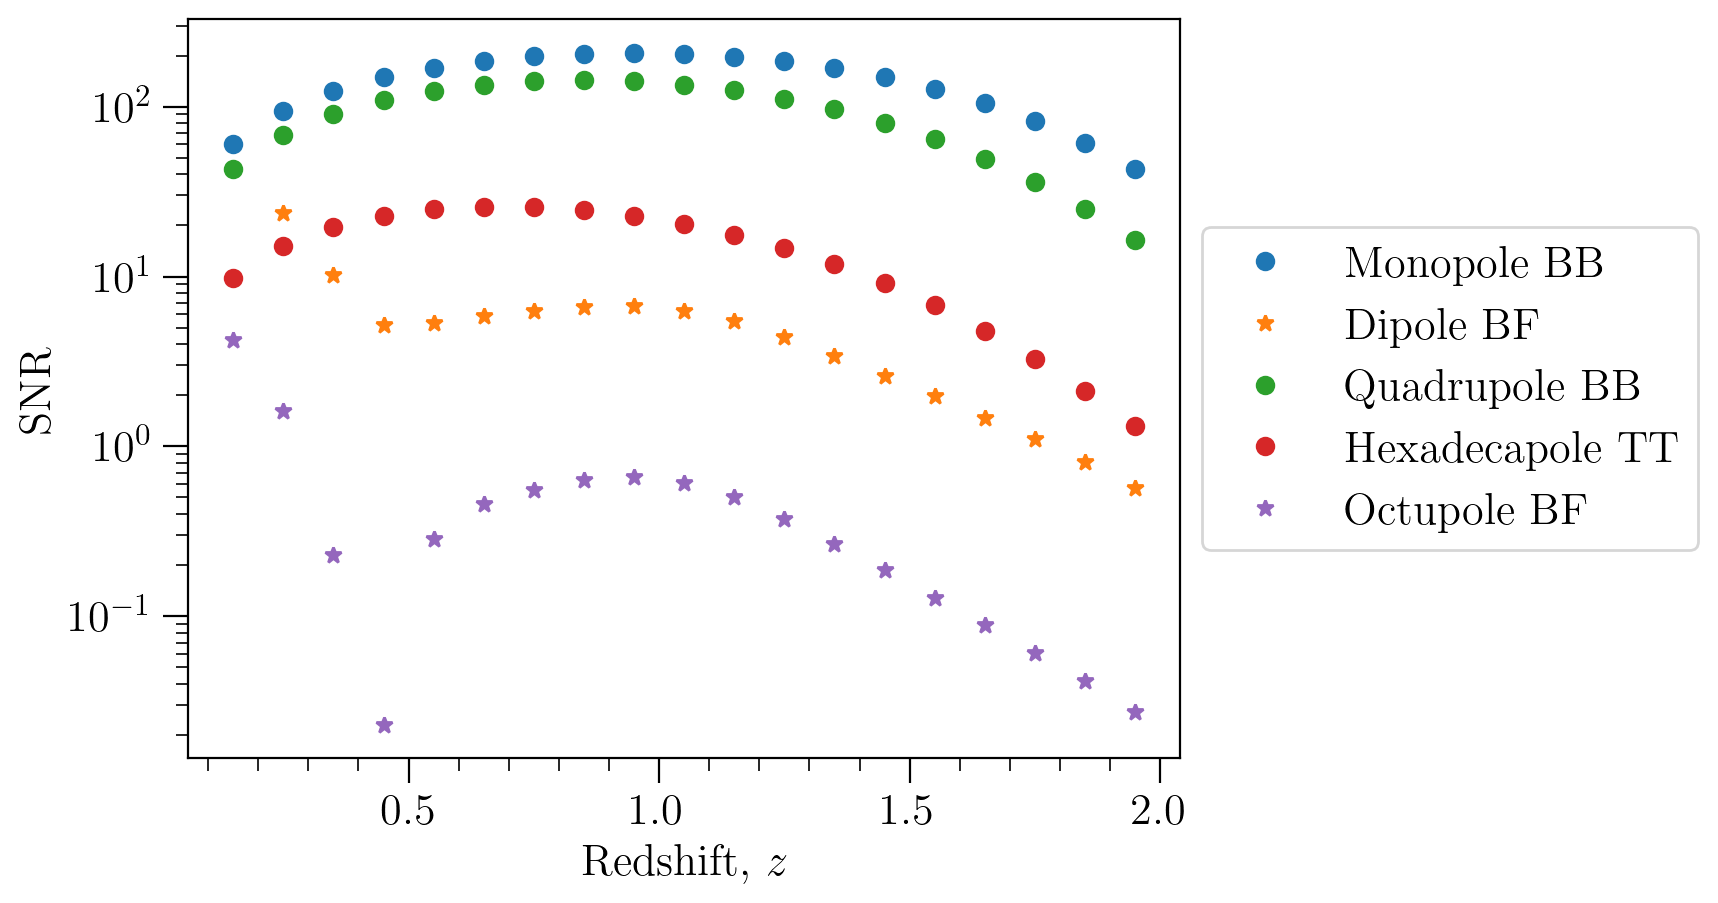

In [26]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole, '*', label=r'Octupole BF')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

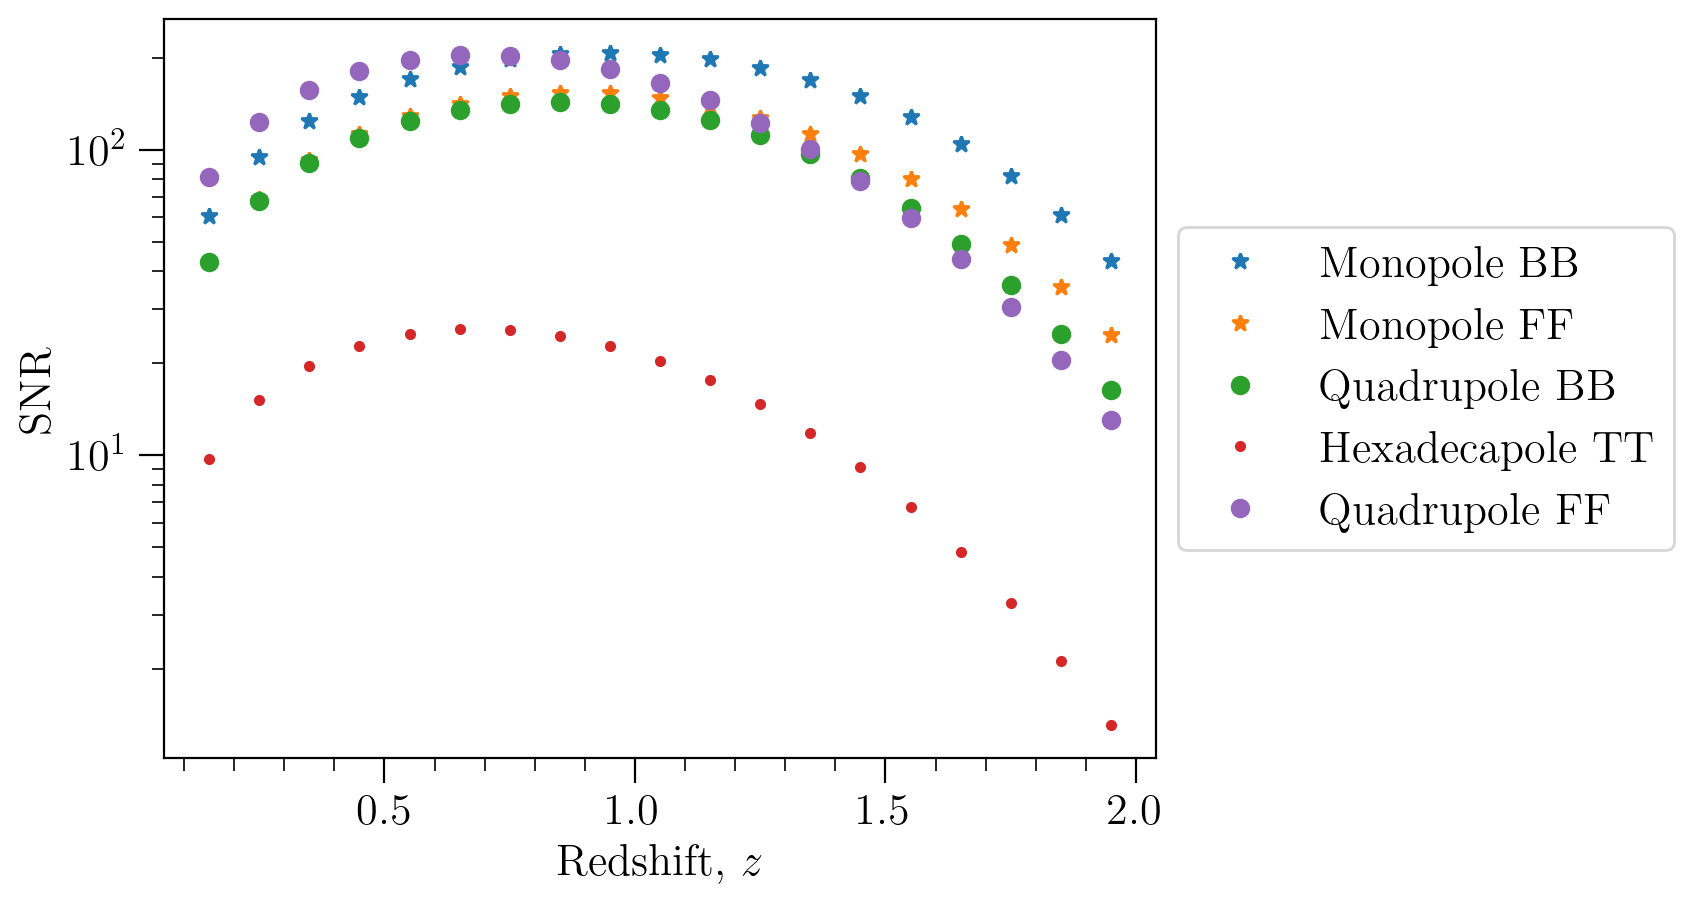

In [27]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB, '*', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole, '.', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_quadrupoleFF, 'o', label=r'Quadrupole FF')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

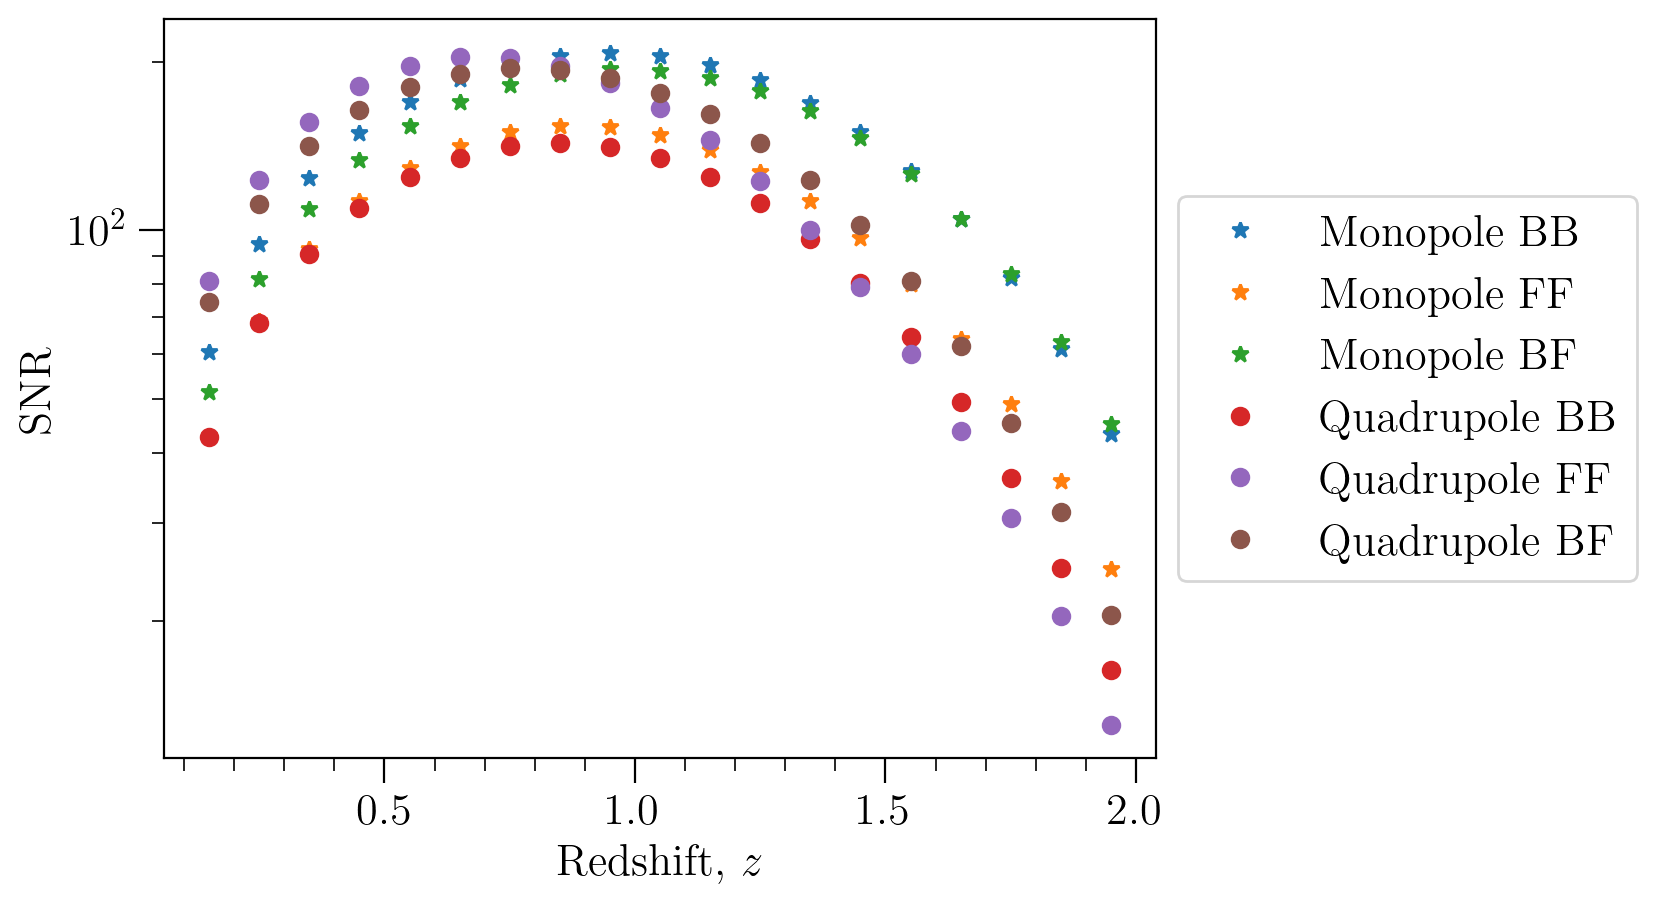

In [28]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB, '*', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_monoBF, '*', label=r'Monopole BF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_quadrupoleFF, 'o', label=r'Quadrupole FF')
plt.plot(z_bins, snr_quadrupoleBF, 'o', label=r'Quadrupole BF')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# S/N for $m=10/3$ 

Compute signals for a given split

In [29]:
m_split = 10/3

mySolver_I = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals_I = Signal(solver=mySolver_I, n_split=m_split, delta=1.2, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, return_lists=True)

multipoles_signals_I = mySignals_I.calculate_signal(d = dist[0], z = z_bins)

In [30]:
np.shape(multipoles_signals_I)

(9, 19, 36)

In [31]:
monopoleBB_I = multipoles_signals_I[0]
monopoleBF_I = multipoles_signals_I[1]
monopoleFF_I = multipoles_signals_I[2]
dipoleBF_I = multipoles_signals_I[3]
quadrupoleBB_I = multipoles_signals_I[4]
quadrupoleBF_I = multipoles_signals_I[5]
quadrupoleFF_I = multipoles_signals_I[6]
hexadecapoleTT_I = multipoles_signals_I[7]
octupoleBF_I = multipoles_signals_I[8]

Import variances of the observables

In [32]:
CovMatrix_all_I = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[30,70]))

np.shape(CovMatrix_all_I)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 30% BRIGHT - 70% FAINT 


 ... Success! ... 



(19, 324, 324)

In [33]:
n_sep = len(monopoleBB[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [34]:
monopoleBB_I[0]/mySignals_I.mu0(dist[0])

array([2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997,
       2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997,
       2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997,
       2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997,
       2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997,
       2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997, 2.3973997])

In [35]:
mySignals_I.galaxybias('b',z_bins)/mySignals_I.s8(z_bins)

array([1.46304247, 1.51378744, 1.56866543, 1.62801308, 1.69219441,
       1.76160313, 1.83666498, 1.9178404 , 2.00562731, 2.10056421,
       2.20323344, 2.31426477, 2.43433928, 2.5641935 , 2.70462397,
       2.85649208, 3.0207294 , 3.19834336, 3.39042346])

In [36]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB_I = CovMatrix_all_I[:, :36, :36]
CovMatrix_monoBF_I = CovMatrix_all_I[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF_I = CovMatrix_all_I[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF_I = CovMatrix_all_I[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB_I = CovMatrix_all_I[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF_I = CovMatrix_all_I[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF_I = CovMatrix_all_I[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT_I = CovMatrix_all_I[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF_I = CovMatrix_all_I[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB_I), np.shape(CovMatrix_dipBF_I), np.shape(CovMatrix_quadBB_I), np.shape(CovMatrix_hexaTT_I), np.shape(CovMatrix_octBF_I), np.shape(CovMatrix_monoFF_I), np.shape(CovMatrix_quadFF_I)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [37]:
cumsnr_monoBB_I, snr_monoBB_I = fm.signal_to_noise(signal = monopoleBB_I, cov = CovMatrix_monoBB_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 61.459654469175184
Bin 2: 95.6368507183715
Bin 3: 125.407860404688
Bin 4: 150.5639962608093
Bin 5: 170.98537808602603
Bin 6: 186.68069852659744
Bin 7: 197.4915069597459
Bin 8: 203.33528414555923
Bin 9: 204.00180940700912
Bin 10: 199.29846131242923
Bin 11: 189.62294229538685
Bin 12: 175.28533497126216
Bin 13: 156.95044856891238
Bin 14: 136.01508499759126
Bin 15: 113.15704217508008
Bin 16: 90.25859313754628
Bin 17: 68.73501784730809
Bin 18: 49.560640186369625
Bin 19: 33.80587661340187

--------------------------------------------------

 Cumulative SNR : 645.1208087782427 

--------------------------------------------------


In [38]:
cumsnr_monoFF_I, snr_monoFF_I = fm.signal_to_noise(signal = monopoleFF_I, cov = CovMatrix_monoFF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 49.331124872957574
Bin 2: 77.95157718546015
Bin 3: 103.56154641836453
Bin 4: 125.68670669436943
Bin 5: 143.96955395382068
Bin 6: 158.3145109429472
Bin 7: 168.45085278424682
Bin 8: 174.29586041456105
Bin 9: 175.66455309107033
Bin 10: 172.43391080680664
Bin 11: 165.08666924222817
Bin 12: 153.89649051343548
Bin 13: 139.3919039907483
Bin 14: 122.69938886467061
Bin 15: 104.16162213326015
Bin 16: 85.2523833153389
Bin 17: 67.02470364620979
Bin 18: 50.19963067602608
Bin 19: 35.761432980243654

--------------------------------------------------

 Cumulative SNR : 558.5703896448233 

--------------------------------------------------


In [39]:
cumsnr_monoBF_I, snr_monoBF_I = fm.signal_to_noise(signal = monopoleBF_I, cov = CovMatrix_monoBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 56.10457480658578
Bin 2: 88.0812506878821
Bin 3: 116.55343056610596
Bin 4: 141.28371866819674
Bin 5: 162.13279752075314
Bin 6: 179.07111740863454
Bin 7: 191.90456779418298
Bin 8: 200.48123451067985
Bin 9: 204.51146524259673
Bin 10: 203.68287958992215
Bin 11: 198.15838239190805
Bin 12: 187.97377782527067
Bin 13: 173.42434356061406
Bin 14: 155.4769882651748
Bin 15: 134.41762174297622
Bin 16: 111.82614968345317
Bin 17: 89.0243013087392
Bin 18: 67.12837293471323
Bin 19: 47.76557298182686

--------------------------------------------------

 Cumulative SNR : 661.2664635299808 

--------------------------------------------------


In [40]:
cumsnr_dipole_I, snr_dipole_I = fm.signal_to_noise(signal = dipoleBF_I, cov = CovMatrix_dipBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 52.54553725984798
Bin 2: 28.594421097533
Bin 3: 17.200362493428848
Bin 4: 8.873779702632786
Bin 5: 6.913552253511131
Bin 6: 7.00951457117607
Bin 7: 7.41432854257319
Bin 8: 7.170161489417258
Bin 9: 6.510130998287908
Bin 10: 5.694597761303777
Bin 11: 4.900444166293899
Bin 12: 4.184928774657454
Bin 13: 3.51187248480441
Bin 14: 2.8797568406474157
Bin 15: 2.297493173681613
Bin 16: 1.7874483096553877
Bin 17: 1.3555210329132326
Bin 18: 0.9938686262455404
Bin 19: 0.6960088942123032

--------------------------------------------------

 Cumulative SNR : 65.61503172717033 

--------------------------------------------------


In [41]:
cumsnr_quadrupoleBB_I, snr_quadrupoleBB_I = fm.signal_to_noise(signal = quadrupoleBB_I, cov = CovMatrix_quadBB_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 35.6857039447887
Bin 2: 57.41998885906387
Bin 3: 76.9326824527531
Bin 4: 93.44954031502252
Bin 5: 106.47701287242162
Bin 6: 115.78684047685616
Bin 7: 121.1864677306481
Bin 8: 122.65221004509525
Bin 9: 120.18372237717892
Bin 10: 113.90039802864806
Bin 11: 104.40808456699801
Bin 12: 92.32908728566366
Bin 13: 78.53768668630244
Bin 14: 64.26935306610996
Bin 15: 50.21634377479613
Bin 16: 37.495919595278885
Bin 17: 26.69664957011029
Bin 18: 17.999753643084723
Bin 19: 11.4974510834784

--------------------------------------------------

 Cumulative SNR : 368.69231497177464 

--------------------------------------------------


In [42]:
cumsnr_quadrupoleFF_I, snr_quadrupoleFF_I = fm.signal_to_noise(signal = quadrupoleFF_I, cov = CovMatrix_quadFF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 75.5630582667594
Bin 2: 115.24699693317972
Bin 3: 147.56538682434285
Bin 4: 172.2916997252982
Bin 5: 189.45334966274945
Bin 6: 199.4739943052293
Bin 7: 202.62701038191958
Bin 8: 199.4750950325498
Bin 9: 190.52528665292667
Bin 10: 176.43343897334427
Bin 11: 158.5648575932955
Bin 12: 138.03023256915725
Bin 13: 116.12660231851028
Bin 14: 94.50460232621707
Bin 15: 73.85459106913021
Bin 16: 55.49383391806138
Bin 17: 39.99944642540512
Bin 18: 27.45652435083733
Bin 19: 17.938408984841022

--------------------------------------------------

 Cumulative SNR : 610.1082391329876 

--------------------------------------------------


In [43]:
cumsnr_quadrupoleBF_I, snr_quadrupoleBF_I = fm.signal_to_noise(signal = quadrupoleBF_I, cov = CovMatrix_quadBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 63.44991904666761
Bin 2: 97.03820698118894
Bin 3: 124.83431495676075
Bin 4: 146.78554920588888
Bin 5: 163.0197299505666
Bin 6: 173.823706421765
Bin 7: 179.37761003897774
Bin 8: 179.93761181963765
Bin 9: 175.67534110304157
Bin 10: 166.79479009178996
Bin 11: 153.97281973756486
Bin 12: 137.82881431714048
Bin 13: 119.24725352323998
Bin 14: 99.6183249180559
Bin 15: 79.72723257161913
Bin 16: 61.09059800124035
Bin 17: 44.66975279865274
Bin 18: 30.925329085949848
Bin 19: 20.243966674773503

--------------------------------------------------

 Cumulative SNR : 557.5808681472905 

--------------------------------------------------


In [44]:
cumsnr_hexadecapole_I, snr_hexadecapole_I = fm.signal_to_noise(signal = hexadecapoleTT_I, cov = CovMatrix_hexaTT_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [45]:
cumsnr_octupole_I, snr_octupole_I = fm.signal_to_noise(signal = octupoleBF_I, cov = CovMatrix_octBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 6.565269336119777
Bin 2: 2.4313205043814357
Bin 3: 1.3679710426911016
Bin 4: 0.5603151872658002
Bin 5: 0.48572948653733494
Bin 6: 0.5941797577172827
Bin 7: 0.6947308707406007
Bin 8: 0.6787889173952208
Bin 9: 0.6003440528286562
Bin 10: 0.5024090907550409
Bin 11: 0.4121579392025145
Bin 12: 0.3354552641775255
Bin 13: 0.2673357703790241
Bin 14: 0.2066792527487975
Bin 15: 0.15466854838637195
Bin 16: 0.11241640700405466
Bin 17: 0.07950290967142193
Bin 18: 0.054359751186957274
Bin 19: 0.03546336133307082

--------------------------------------------------

 Cumulative SNR : 7.334049153630124 

--------------------------------------------------


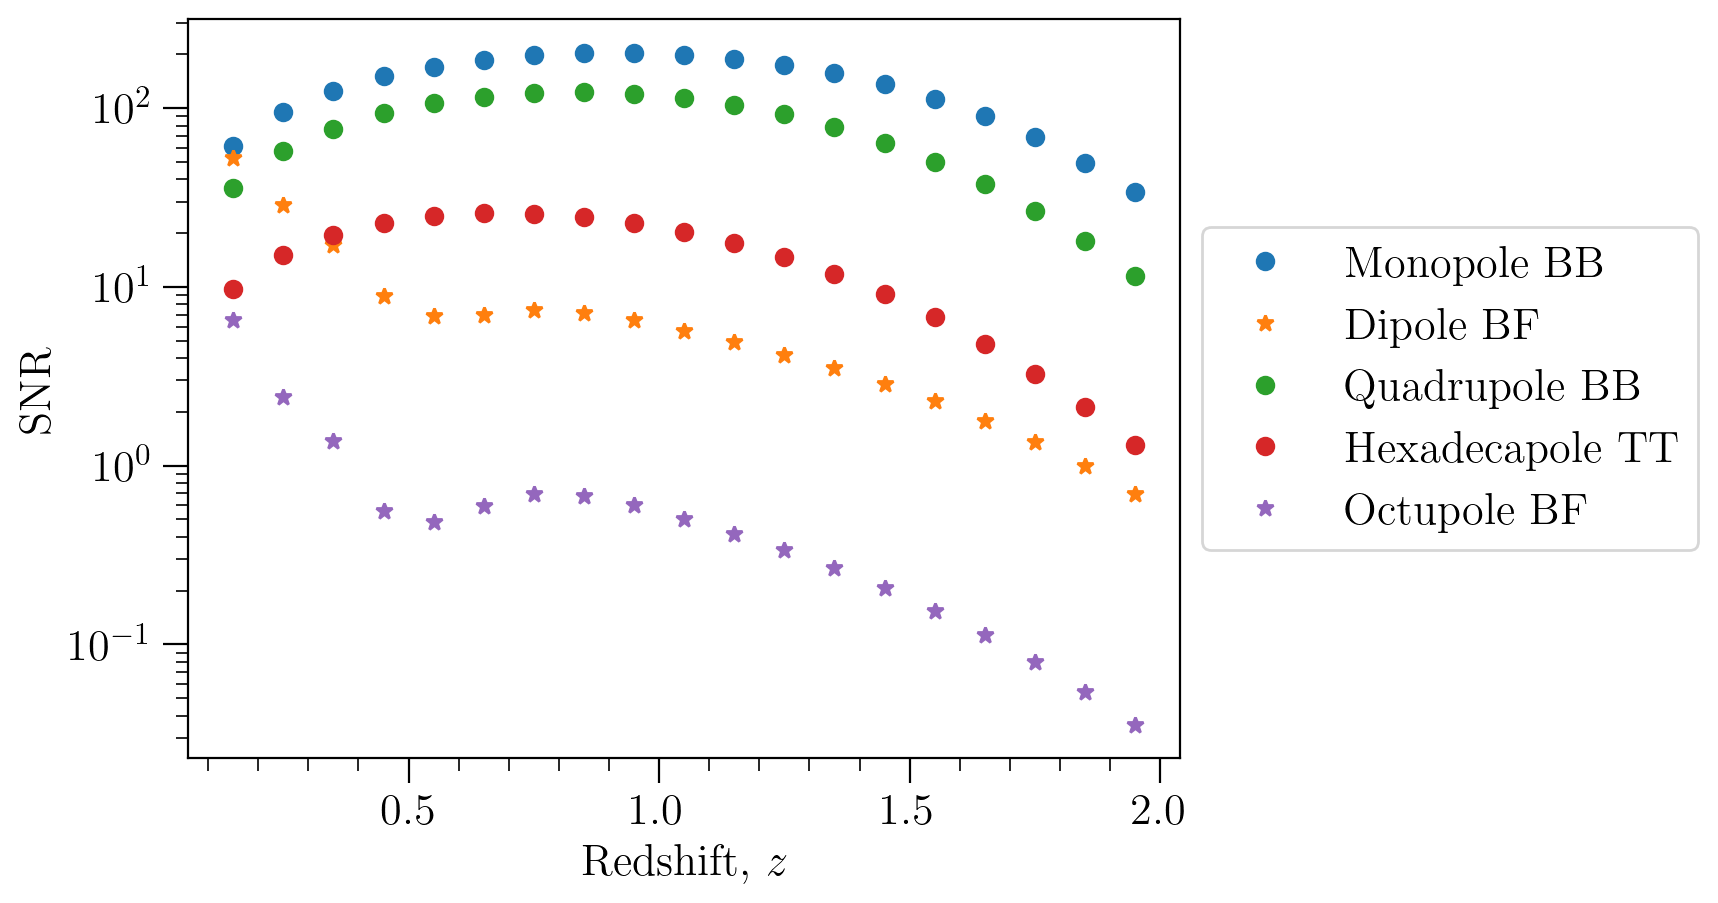

In [46]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB_I, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole_I, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB_I, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole_I, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole_I, '*', label=r'Octupole BF')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

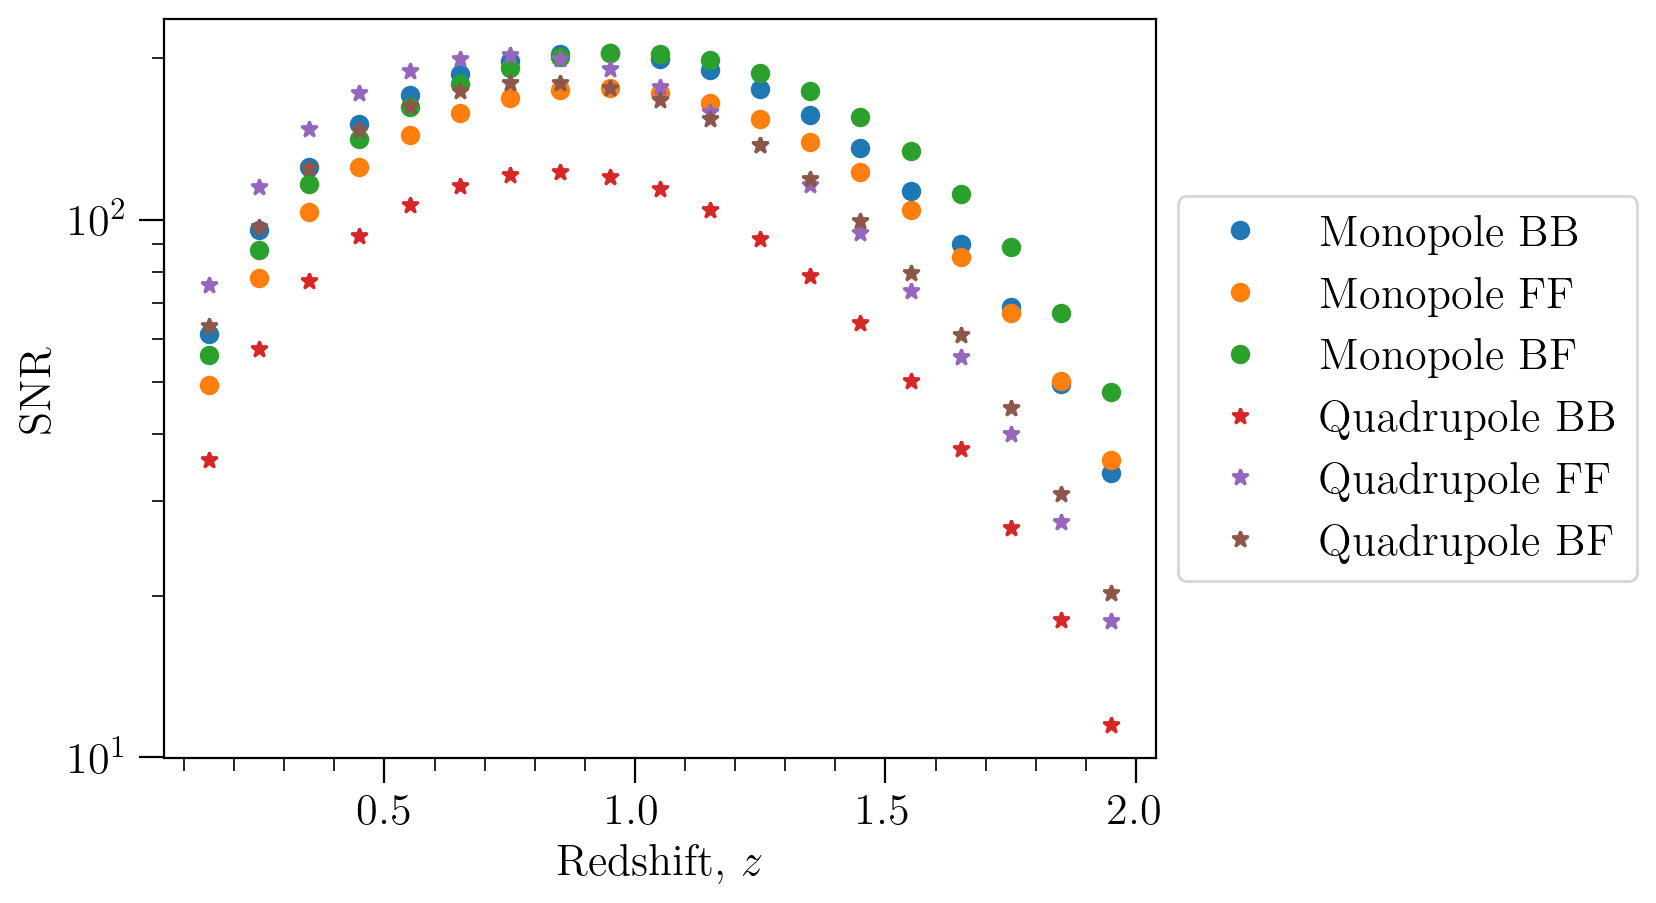

In [47]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB_I, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF_I, 'o', label=r'Monopole FF')
plt.plot(z_bins, snr_monoBF_I, 'o', label=r'Monopole BF')
plt.plot(z_bins, snr_quadrupoleBB_I, '*', label=r'Quadrupole BB')
plt.plot(z_bins, snr_quadrupoleFF_I, '*', label=r'Quadrupole FF')
plt.plot(z_bins, snr_quadrupoleBF_I, '*', label=r'Quadrupole BF')


plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

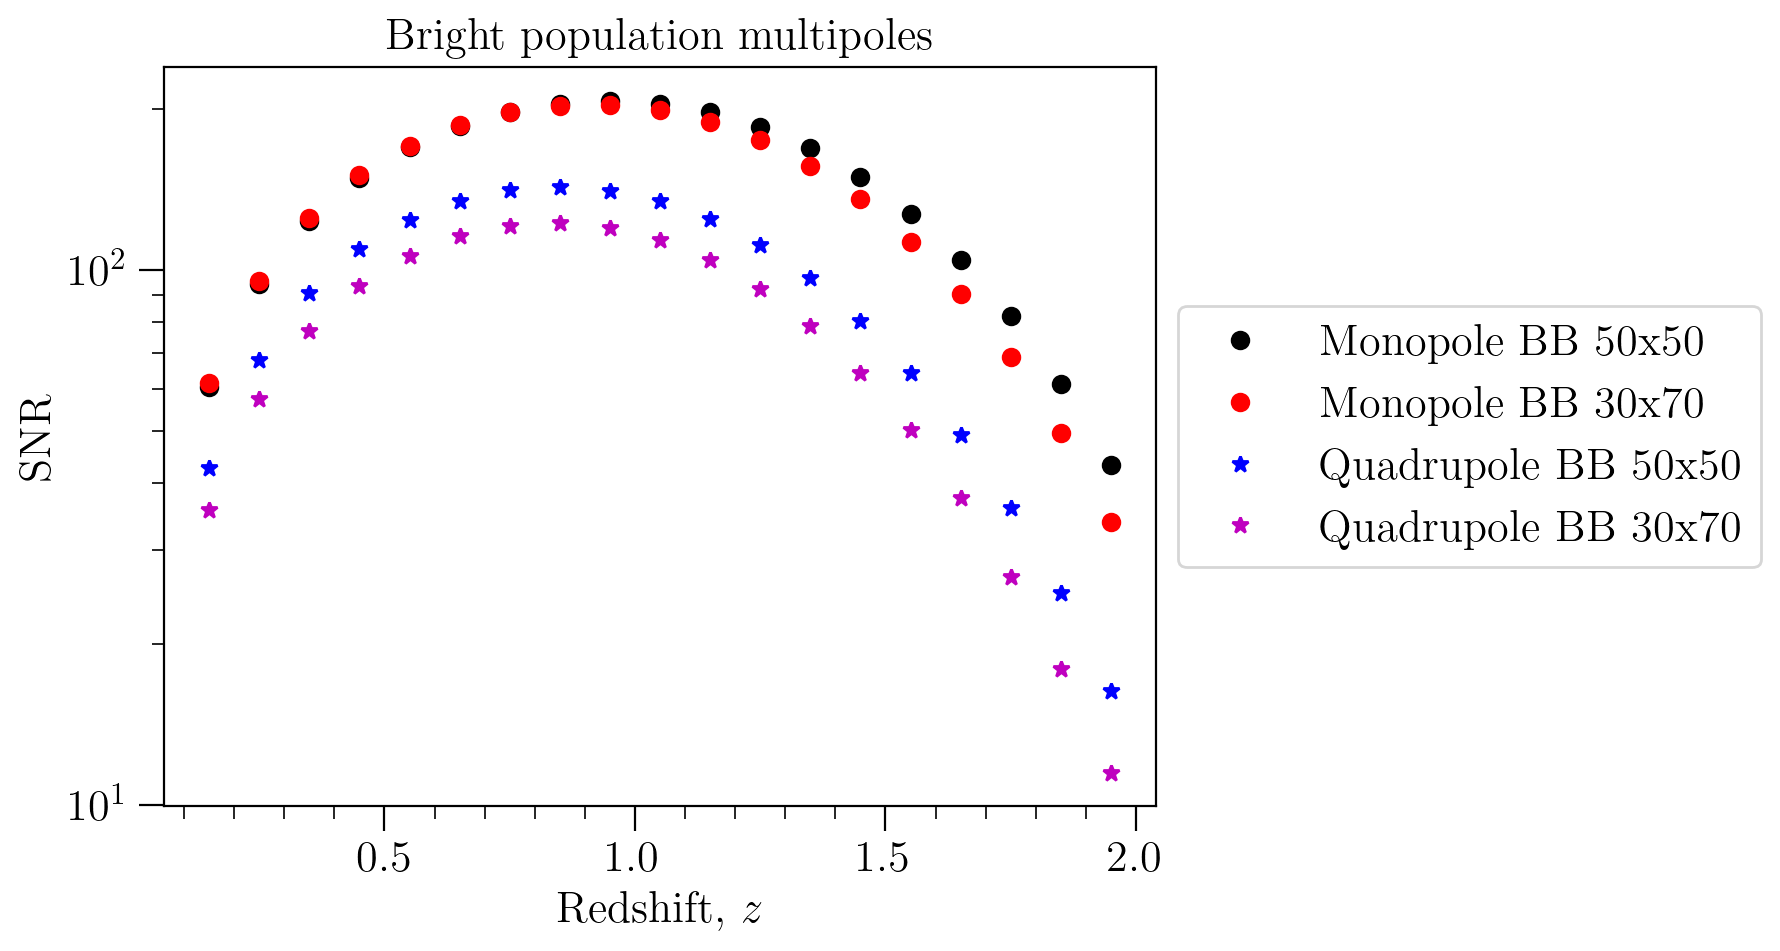

In [48]:
plt.plot(z_bins, snr_monoBB, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoBB_I, 'ro', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_quadrupoleBB, 'b*', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleBB_I, 'm*', label=r'Quadrupole BB 30x70')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Bright population multipoles');

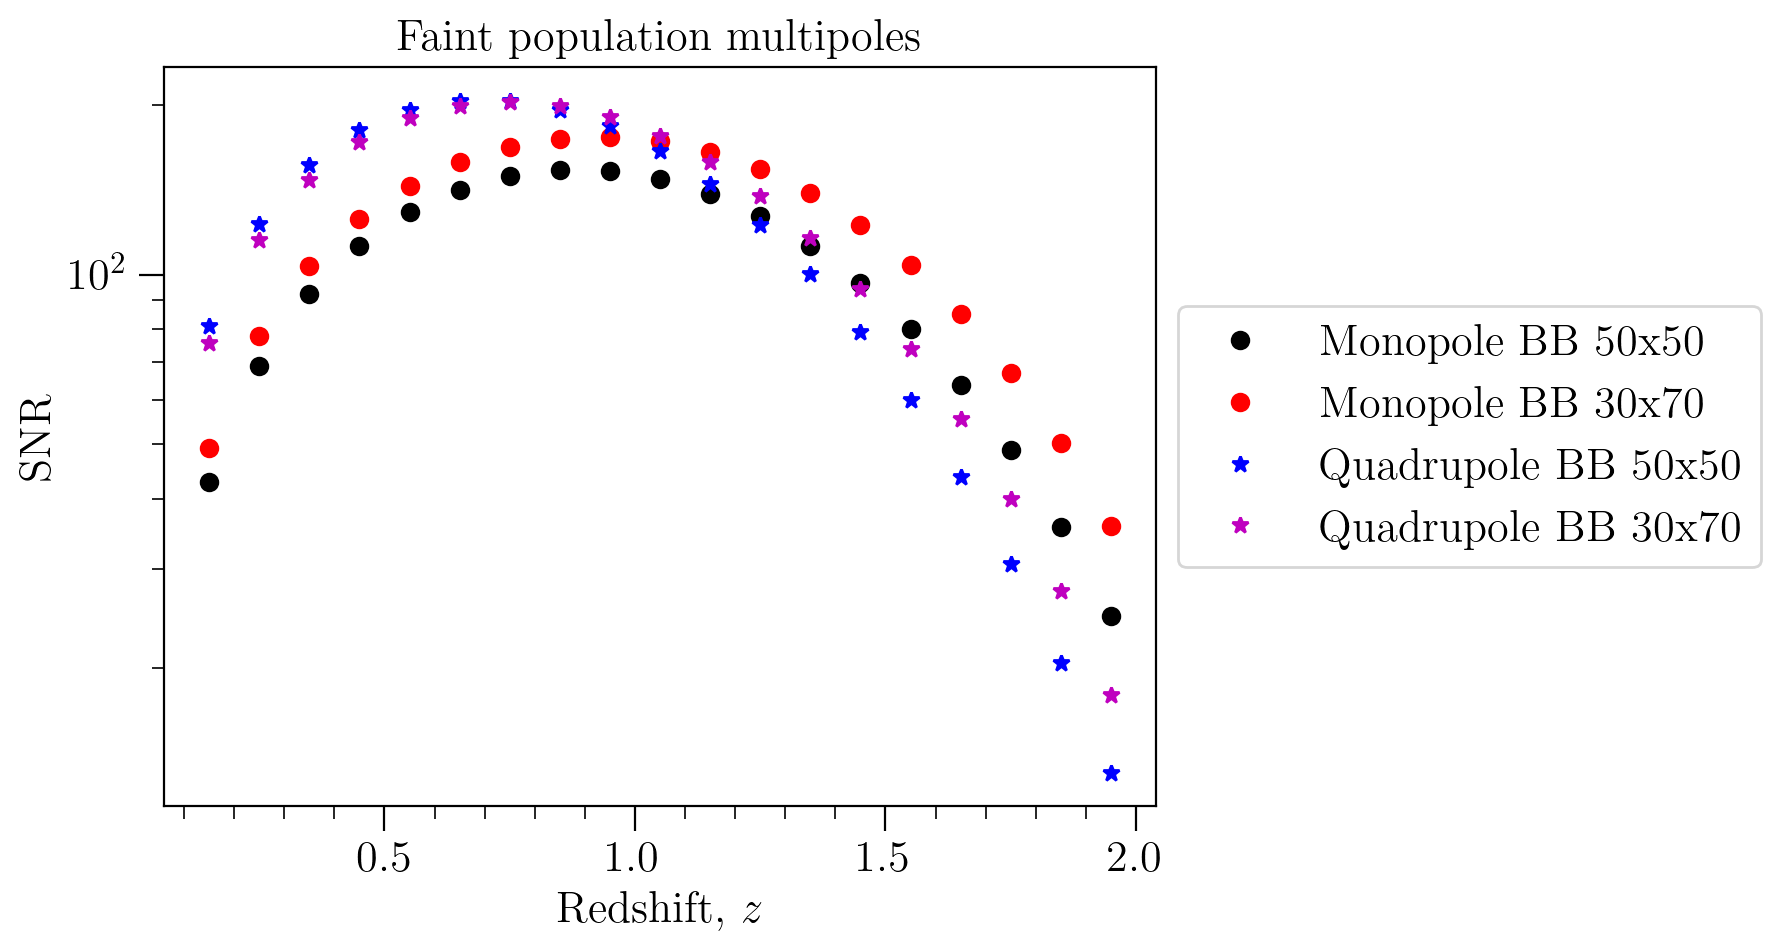

In [49]:
plt.plot(z_bins, snr_monoFF, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoFF_I, 'ro', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_quadrupoleFF, 'b*', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleFF_I, 'm*', label=r'Quadrupole BB 30x70')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Faint population multipoles');

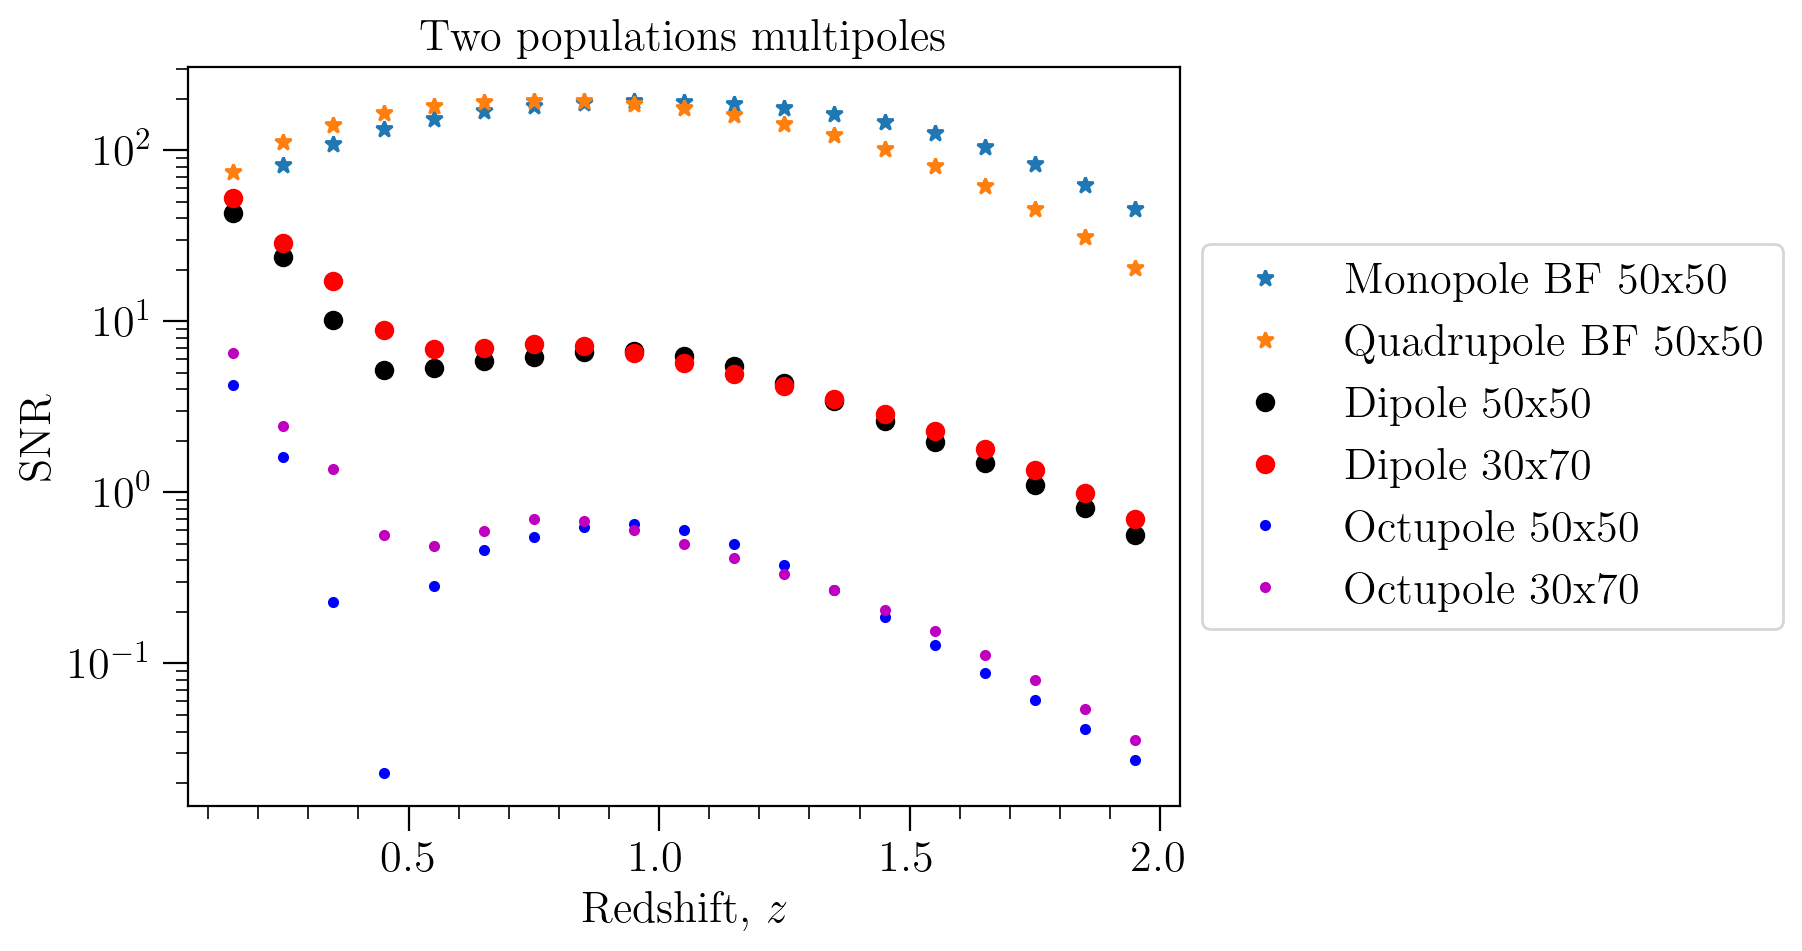

In [50]:
plt.plot(z_bins, snr_monoBF, '*', label=r'Monopole BF 50x50')
plt.plot(z_bins, snr_quadrupoleBF, '*', label=r'Quadrupole BF 50x50')
plt.plot(z_bins, snr_dipole, 'ko', label=r'Dipole 50x50')
plt.plot(z_bins, snr_dipole_I, 'ro', label=r'Dipole 30x70')
plt.plot(z_bins, snr_octupole, 'b.', label=r'Octupole 50x50')
plt.plot(z_bins, snr_octupole_I, 'm.', label=r'Octupole 30x70')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Two populations multipoles');

# S/N for $m=10/7$ 

Compute signals for a given split

In [51]:
m_split = 10/7

mySolver_II = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals_II = Signal(solver=mySolver_II, n_split=m_split, delta=0.8, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, return_lists=True)

multipoles_signals_II = mySignals_II.calculate_signal(d = dist[0], z = z_bins)

In [52]:
np.shape(multipoles_signals_II)

(9, 19, 36)

In [53]:
monopoleBB_II = multipoles_signals_II[0]
monopoleBF_II = multipoles_signals_II[1]
monopoleFF_II = multipoles_signals_II[2]
dipoleBF_II = multipoles_signals_II[3]
quadrupoleBB_II = multipoles_signals_II[4]
quadrupoleBF_II = multipoles_signals_II[5]
quadrupoleFF_II = multipoles_signals_II[6]
hexadecapoleTT_II = multipoles_signals_II[7]
octupoleBF_II = multipoles_signals_II[8]

Import variances of the observables

In [54]:
CovMatrix_all_II = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[70,30]))

np.shape(CovMatrix_all)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 70% BRIGHT - 30% FAINT 


 ... Success! ... 



(19, 324, 324)

In [55]:
n_sep = len(monopoleBB_II[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [56]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB_II = CovMatrix_all_II[:, :36, :36]
CovMatrix_monoBF_II = CovMatrix_all_II[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF_II = CovMatrix_all_II[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF_II = CovMatrix_all_II[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB_II = CovMatrix_all_II[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF_II = CovMatrix_all_II[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF_II = CovMatrix_all_II[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT_II = CovMatrix_all_II[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF_II = CovMatrix_all_II[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB_II), np.shape(CovMatrix_dipBF_II), np.shape(CovMatrix_quadBB_II), np.shape(CovMatrix_hexaTT_II), np.shape(CovMatrix_octBF_II), np.shape(CovMatrix_monoFF_II), np.shape(CovMatrix_quadFF_II)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [57]:
cumsnr_monoBB_II, snr_monoBB_II = fm.signal_to_noise(signal = monopoleBB_II, cov = CovMatrix_monoBB_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 59.45099244807726
Bin 2: 92.56245567528788
Bin 3: 121.59298986986742
Bin 4: 146.43655918067702
Bin 5: 167.06034370583635
Bin 6: 183.5237678632582
Bin 7: 195.72300664520364
Bin 8: 203.59142985677443
Bin 9: 206.91730977145295
Bin 10: 205.44764299617688
Bin 11: 199.37143403702626
Bin 12: 188.74199382004824
Bin 13: 173.8720632137604
Bin 14: 155.74519653830237
Bin 15: 134.68694090143228
Bin 16: 112.2777733937365
Bin 17: 89.81114681307537
Bin 18: 68.30705777811245
Bin 19: 49.21545257810137

--------------------------------------------------

 Cumulative SNR : 671.1652935806623 

--------------------------------------------------


In [58]:
cumsnr_monoFF_II, snr_monoFF_II = fm.signal_to_noise(signal = monopoleFF_II, cov = CovMatrix_monoFF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 38.75864370383417
Bin 2: 62.44980172489927
Bin 3: 83.70611930058655
Bin 4: 101.53495188251982
Bin 5: 115.26282009251653
Bin 6: 124.84289862506479
Bin 7: 130.00867312661603
Bin 8: 130.915988357516
Bin 9: 127.64392479083902
Bin 10: 120.44994521416048
Bin 11: 110.32007165788329
Bin 12: 97.88156775488812
Bin 13: 83.95447643728485
Bin 14: 69.75206667838007
Bin 15: 55.65346100895907
Bin 16: 42.781219478834295
Bin 17: 31.655871082473855
Bin 18: 22.4118131533487
Bin 19: 15.216784508850315

--------------------------------------------------

 Cumulative SNR : 395.9298536338734 

--------------------------------------------------


In [59]:
cumsnr_monoBF_II, snr_monoBF_II = fm.signal_to_noise(signal = monopoleBF_II, cov = CovMatrix_monoBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 47.30287834707628
Bin 2: 76.3474480983825
Bin 3: 102.67304874861577
Bin 4: 125.55148529668492
Bin 5: 144.56844523272457
Bin 6: 159.6506687079027
Bin 7: 170.54635593935288
Bin 8: 177.18029281499653
Bin 9: 179.35072878443006
Bin 10: 176.89383229767404
Bin 11: 170.22252249296025
Bin 12: 159.5426064203148
Bin 13: 145.31576472788117
Bin 14: 128.61847559992404
Bin 15: 109.76198582598617
Bin 16: 90.23203844682934
Bin 17: 71.13991435748684
Bin 18: 53.30801474416566
Bin 19: 37.882326231120835

--------------------------------------------------

 Cumulative SNR : 571.2381074216476 

--------------------------------------------------


In [60]:
cumsnr_dipole_II, snr_dipole_II = fm.signal_to_noise(signal = dipoleBF_II, cov = CovMatrix_dipBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 45.30404293726041
Bin 2: 8.348822773675991
Bin 3: 2.2787138137500325
Bin 4: 1.786294818007681
Bin 5: 2.09028192633823
Bin 6: 6.9895337531052375
Bin 7: 10.03742781404862
Bin 8: 9.790019893088868
Bin 9: 7.786439644806908
Bin 10: 5.6934579650489
Bin 11: 4.003570086376347
Bin 12: 2.7529836322460537
Bin 13: 1.9223661649341812
Bin 14: 1.3617783753950943
Bin 15: 0.996689220286165
Bin 16: 0.7573412464916558
Bin 17: 0.5907264475614978
Bin 18: 0.46632750256689076
Bin 19: 0.34874208772306536

--------------------------------------------------

 Cumulative SNR : 50.04814049287274 

--------------------------------------------------


In [61]:
cumsnr_quadrupoleBB_II, snr_quadrupoleBB_II = fm.signal_to_noise(signal = quadrupoleBB_II, cov = CovMatrix_quadBB_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 50.00895599141636
Bin 2: 78.95293991638096
Bin 3: 104.15955371959497
Bin 4: 124.98346397457196
Bin 5: 141.11606746893816
Bin 6: 152.52357169442178
Bin 7: 159.18039144343507
Bin 8: 161.20121379787778
Bin 9: 158.67408269519484
Bin 10: 151.7467636689846
Bin 11: 141.01660919571628
Bin 12: 127.04765206999221
Bin 13: 110.6613200373398
Bin 14: 93.144419011501
Bin 15: 75.22550743794687
Bin 16: 58.283542252478576
Bin 17: 43.19232039115205
Bin 18: 30.384710319197687
Bin 19: 20.25404433582166

--------------------------------------------------

 Cumulative SNR : 497.1056035935252 

--------------------------------------------------


In [62]:
cumsnr_quadrupoleFF_II, snr_quadrupoleFF_II = fm.signal_to_noise(signal = quadrupoleFF_II, cov = CovMatrix_quadFF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 81.12609038746032
Bin 2: 122.58417759568395
Bin 3: 154.3927566166663
Bin 4: 176.19903519980465
Bin 5: 188.19550660234358
Bin 6: 191.53733841696308
Bin 7: 187.01078671166078
Bin 8: 176.02704392846047
Bin 9: 159.846770779504
Bin 10: 139.91671738957143
Bin 11: 118.41003731137133
Bin 12: 96.73162915967464
Bin 13: 76.17548629565198
Bin 14: 58.008574997024304
Bin 15: 42.37286607678359
Bin 16: 29.812871896440427
Bin 17: 20.194821670177056
Bin 18: 13.09355581321991
Bin 19: 8.146788881122825

--------------------------------------------------

 Cumulative SNR : 543.6519414423014 

--------------------------------------------------


In [63]:
cumsnr_quadrupoleBF_II, snr_quadrupoleBF_II = fm.signal_to_noise(signal = quadrupoleBF_II, cov = CovMatrix_quadBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 79.40946908839797
Bin 2: 118.23334358420911
Bin 3: 148.7553504648578
Bin 4: 171.45562691828397
Bin 5: 186.79047560186416
Bin 6: 195.4346467186796
Bin 7: 197.78410284566834
Bin 8: 194.42199764337937
Bin 9: 185.80475473528858
Bin 10: 172.4739653897296
Bin 11: 155.5988339977105
Bin 12: 136.11140806699223
Bin 13: 115.1437869088512
Bin 14: 94.21914194342291
Bin 15: 74.0010471958724
Bin 16: 55.81697310163289
Bin 17: 40.317216332849036
Bin 18: 27.673763160405606
Bin 19: 18.036342724651362

--------------------------------------------------

 Cumulative SNR : 601.885090196023 

--------------------------------------------------


In [64]:
cumsnr_hexadecapole_II, snr_hexadecapole_II = fm.signal_to_noise(signal = hexadecapoleTT_II, cov = CovMatrix_hexaTT_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [65]:
cumsnr_octupole_II, snr_octupole_II = fm.signal_to_noise(signal = octupoleBF_II, cov = CovMatrix_octBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 5.902221134066011
Bin 2: 0.7441119850302002
Bin 3: 0.7518587849497905
Bin 4: 0.9226478830955532
Bin 5: 0.09858617607408904
Bin 6: 0.7457648047233907
Bin 7: 1.226563851287445
Bin 8: 1.176380769052113
Bin 9: 0.8759890618969027
Bin 10: 0.5835791546178545
Bin 11: 0.365201111350285
Bin 12: 0.21721361311042053
Bin 13: 0.12940876197858758
Bin 14: 0.0774198009087374
Bin 15: 0.049160269758988226
Bin 16: 0.034196910116384704
Bin 17: 0.025777081359204507
Bin 18: 0.020465657109125384
Bin 19: 0.015108839154651974

--------------------------------------------------

 Cumulative SNR : 6.448008680774549 

--------------------------------------------------


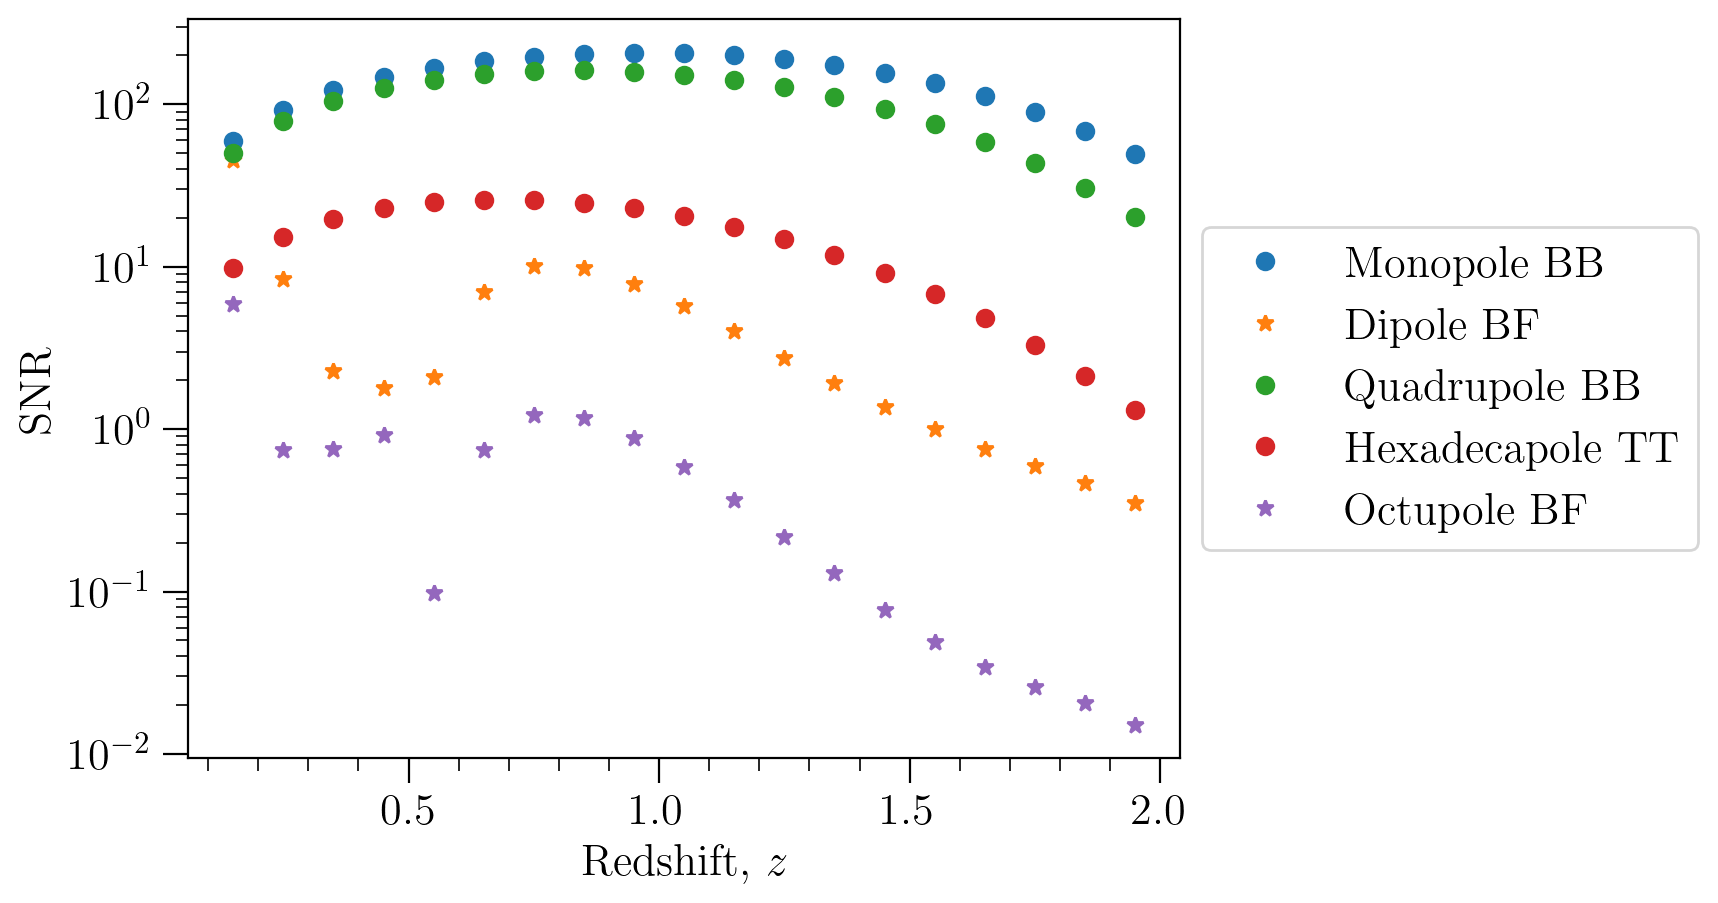

In [66]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB_II, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole_II, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB_II, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole_II, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole_II, '*', label=r'Octupole BF')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

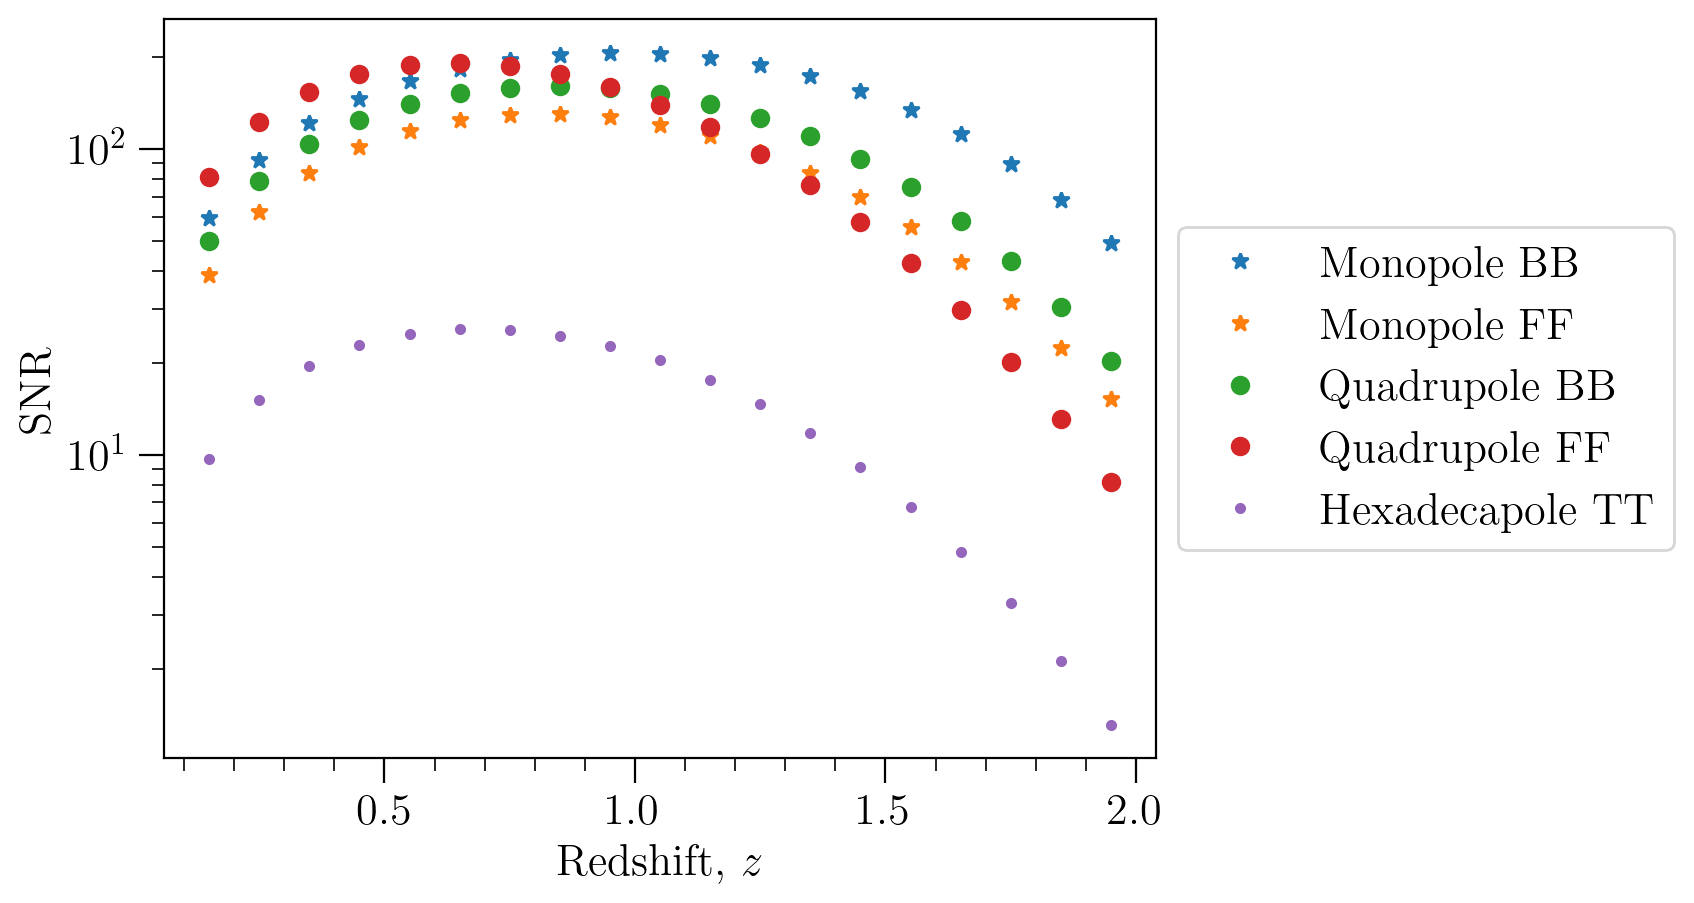

In [67]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB_II, '*', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF_II, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_quadrupoleBB_II, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_quadrupoleFF_II, 'o', label=r'Quadrupole FF')
plt.plot(z_bins, snr_hexadecapole_II, '.', label=r'Hexadecapole TT')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

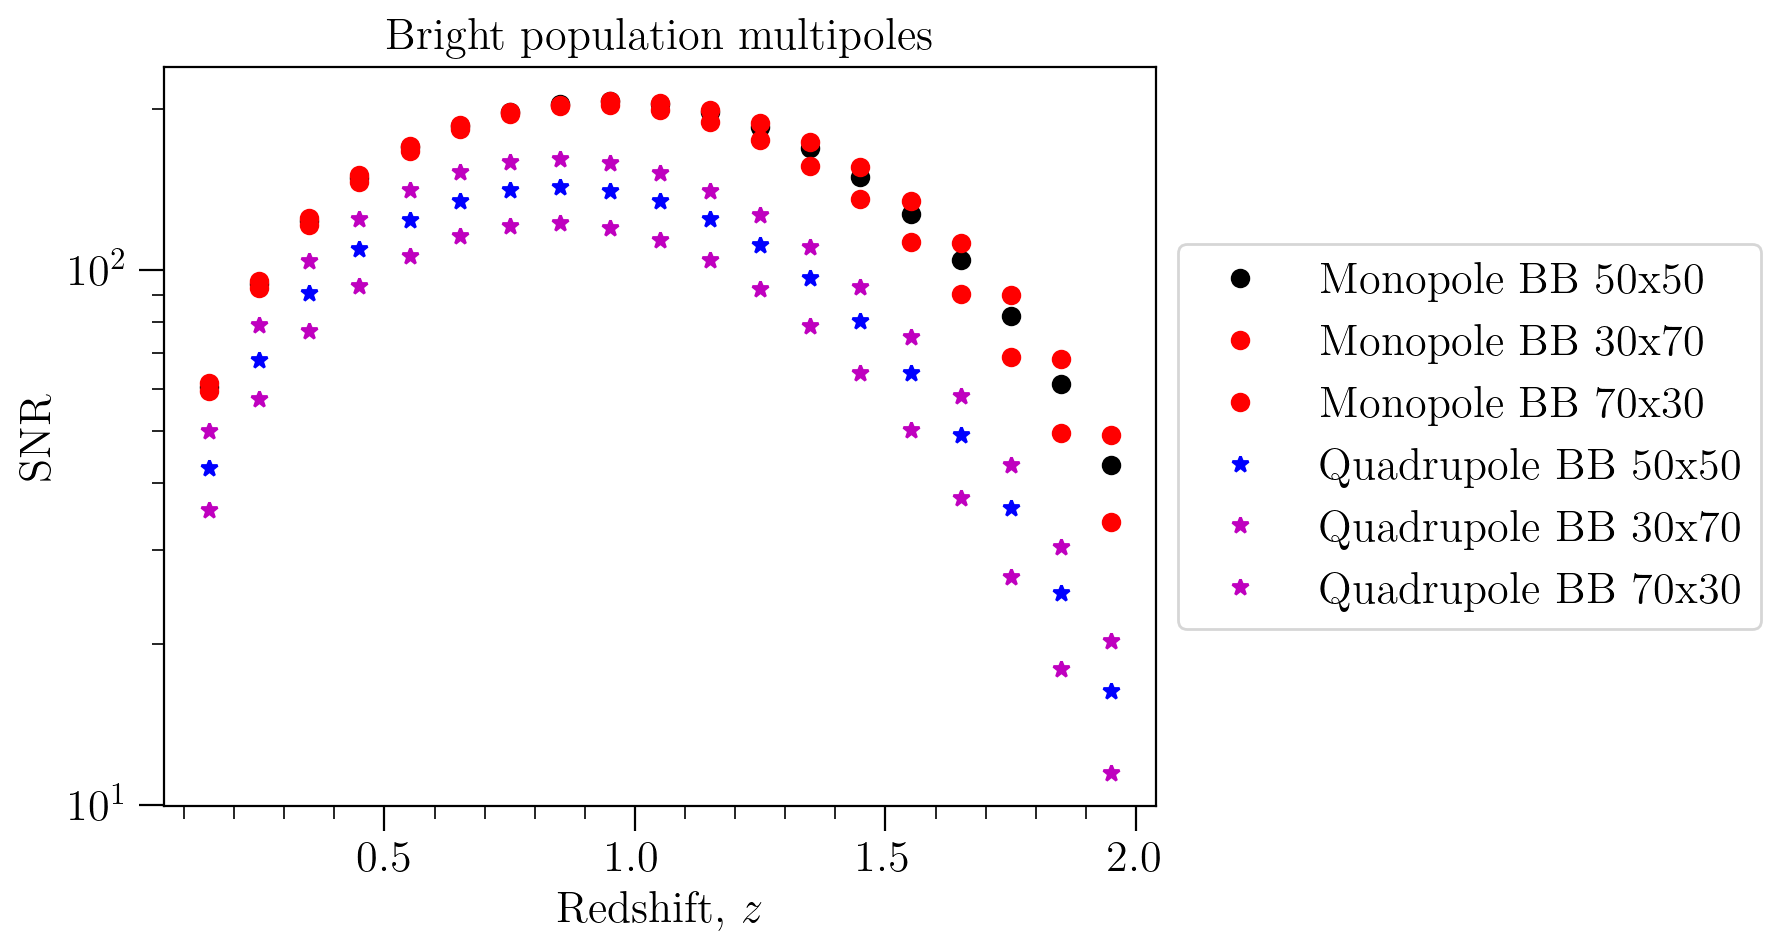

In [68]:
plt.plot(z_bins, snr_monoBB, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoBB_I, 'ro', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_monoBB_II, 'ro', label=r'Monopole BB 70x30')
plt.plot(z_bins, snr_quadrupoleBB, 'b*', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleBB_I, 'm*', label=r'Quadrupole BB 30x70')
plt.plot(z_bins, snr_quadrupoleBB_II, 'm*', label=r'Quadrupole BB 70x30')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Bright population multipoles');

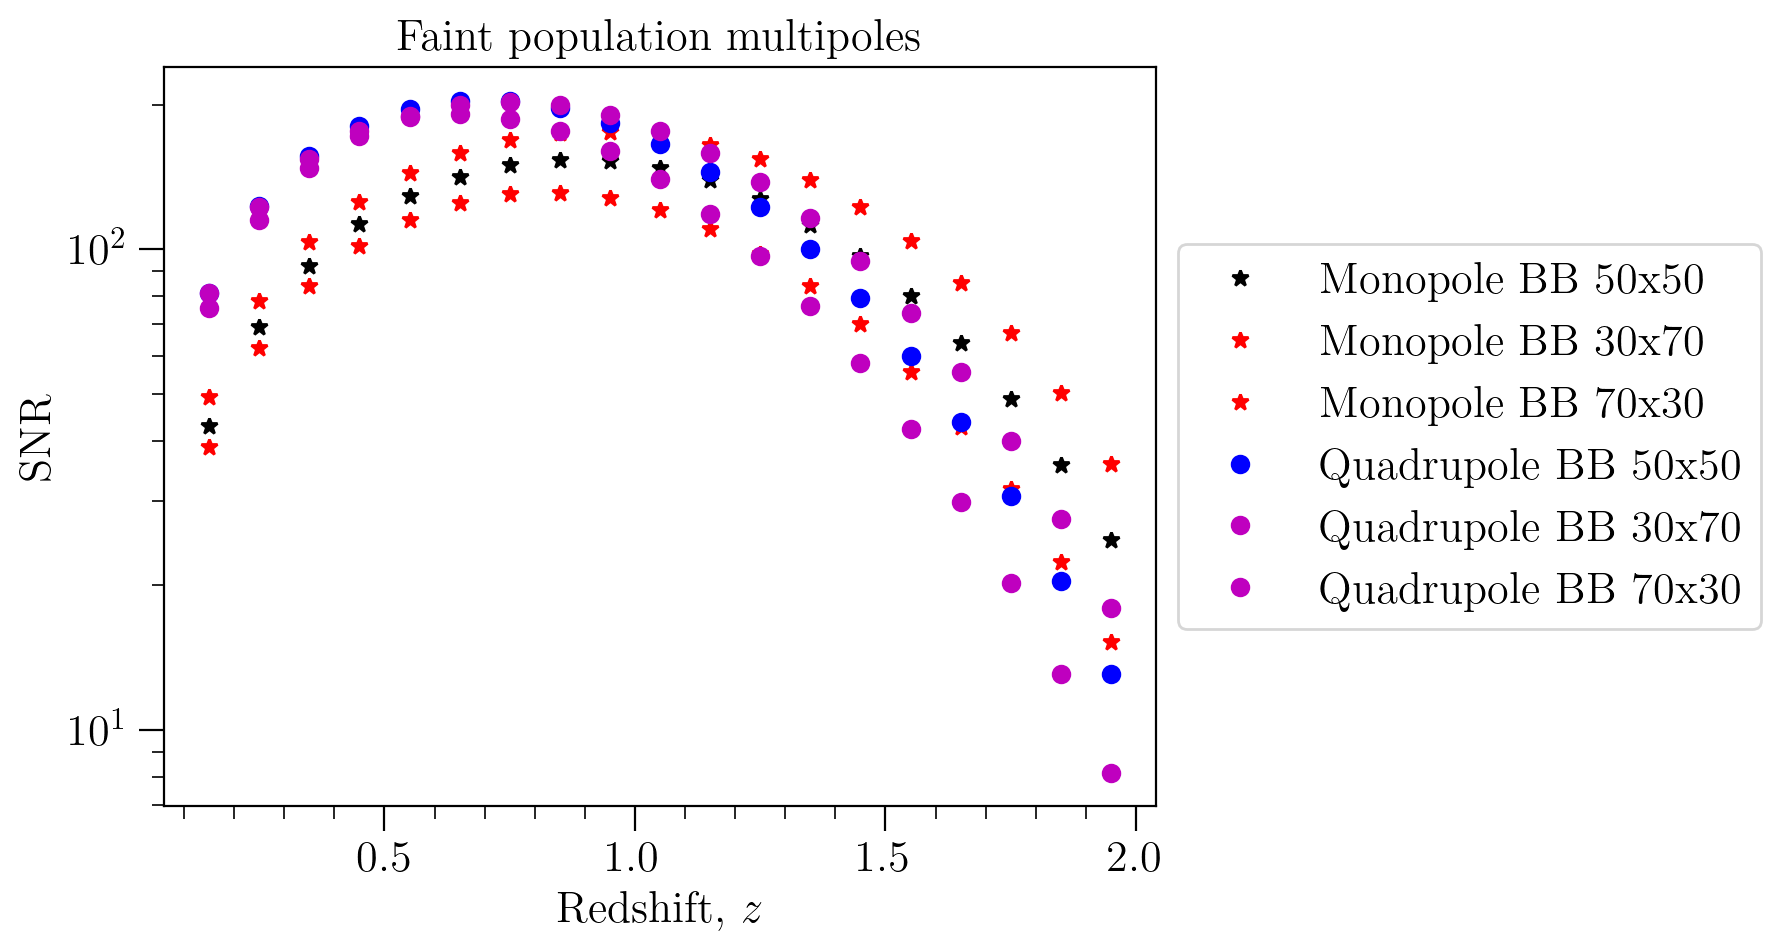

In [69]:
plt.plot(z_bins, snr_monoFF, 'k*', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoFF_I, 'r*', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_monoFF_II, 'r*', label=r'Monopole BB 70x30')
plt.plot(z_bins, snr_quadrupoleFF, 'bo', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleFF_I, 'mo', label=r'Quadrupole BB 30x70')
plt.plot(z_bins, snr_quadrupoleFF_II, 'mo', label=r'Quadrupole BB 70x30')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Faint population multipoles');

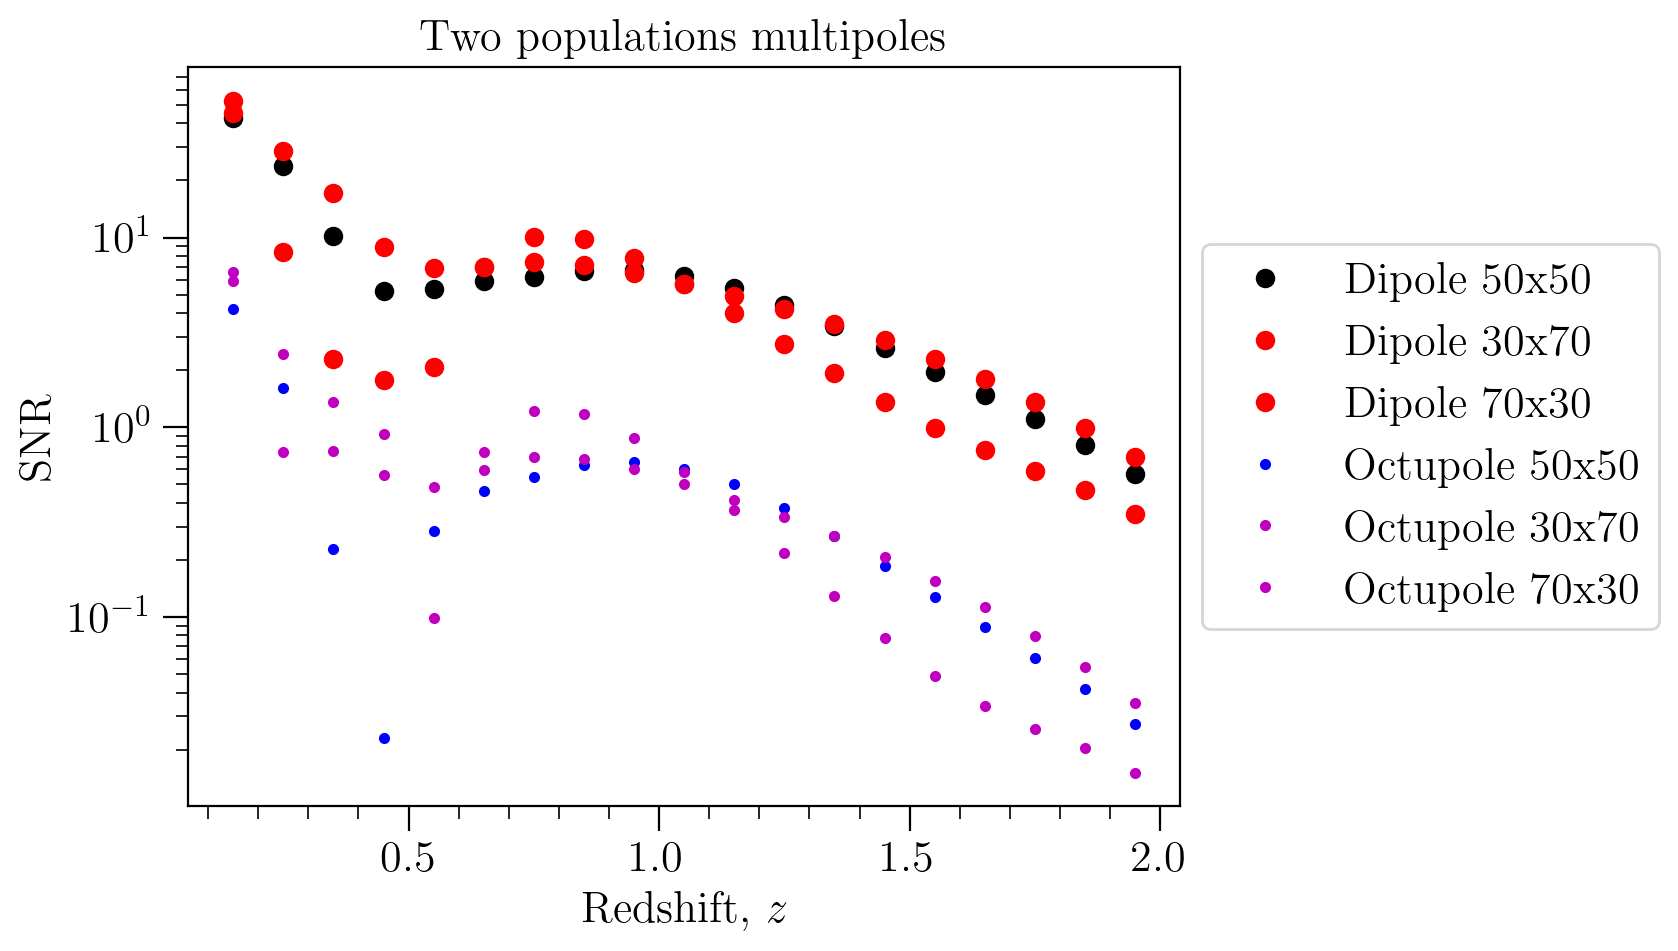

In [70]:
plt.plot(z_bins, snr_dipole, 'ko', label=r'Dipole 50x50')
plt.plot(z_bins, snr_dipole_I, 'ro', label=r'Dipole 30x70')
plt.plot(z_bins, snr_dipole_II, 'ro', label=r'Dipole 70x30')
plt.plot(z_bins, snr_octupole, 'b.', label=r'Octupole 50x50')
plt.plot(z_bins, snr_octupole_I, 'm.', label=r'Octupole 30x70')
plt.plot(z_bins, snr_octupole_II, 'm.', label=r'Octupole 70x30')

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Two populations multipoles');

In [71]:
print('\n ... Cummulative SNRs ... \n')
print('Monopole BB = ', cumsnr_monoBB, cumsnr_monoBB_I, cumsnr_monoBB_II , '\n')
print('Monopole BF = ', cumsnr_monoBF, cumsnr_monoBF_I, cumsnr_monoBF_II , '\n')
print('Monopole FF = ', cumsnr_monoFF, cumsnr_monoFF_I, cumsnr_monoFF_II , '\n')
print('Quadrupole BB = ', cumsnr_quadrupoleBB, cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBB_II, '\n')
print('Quadrupole BF = ', cumsnr_quadrupoleBF, cumsnr_quadrupoleBF_I, cumsnr_quadrupoleBF_II, '\n')
print('Quadrupole FF = ', cumsnr_quadrupoleFF, cumsnr_quadrupoleFF_I, cumsnr_quadrupoleFF_II, '\n')
print('Hexadecapole TT = ', cumsnr_hexadecapole, cumsnr_hexadecapole_I, cumsnr_hexadecapole_II, '\n')
print('Dipole BF = ', cumsnr_dipole, cumsnr_dipole_I, cumsnr_dipole_II, '\n')
print('Octupole BF = ', cumsnr_octupole, cumsnr_octupole_I, cumsnr_octupole_II, '\n')



 ... Cummulative SNRs ... 

Monopole BB =  666.1293674629122 645.1208087782427 671.1652935806623 

Monopole BF =  623.991952992111 661.2664635299808 571.2381074216476 

Monopole FF =  477.2936226286888 558.5703896448233 395.9298536338734 

Quadrupole BB =  437.2648272714865 368.69231497177464 497.1056035935252 

Quadrupole BF =  600.6362450122592 557.5808681472905 601.885090196023 

Quadrupole FF =  599.1609788867955 610.1082391329876 543.6519414423014 

Hexadecapole TT =  74.5007536282539 74.5007536282539 74.5007536282539 

Dipole BF =  53.30131229422584 65.61503172717033 50.04814049287274 

Octupole BF =  4.775075483821324 7.334049153630124 6.448008680774549 



# Results

In [72]:
results_cumsnr_dict = {
    'Mono BB' : [cumsnr_monoBB_I, cumsnr_monoBB, cumsnr_monoBB_II],
    'Mono BF' : [cumsnr_monoBF_I, cumsnr_monoBF, cumsnr_monoBF_II],
    'Mono FF' : [cumsnr_monoFF_I, cumsnr_monoFF, cumsnr_monoFF_II],
    'Dipole BF' : [cumsnr_dipole_I, cumsnr_dipole, cumsnr_dipole_II],
    'Quad BB' : [cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBB, cumsnr_quadrupoleBB_II],
    'Quad BF' : [cumsnr_quadrupoleBF_I, cumsnr_quadrupoleBF, cumsnr_quadrupoleBF_II],
    'Quad FF' : [cumsnr_quadrupoleFF_I, cumsnr_quadrupoleFF, cumsnr_quadrupoleFF_II],
    'Hexa TT' : [cumsnr_hexadecapole_I, cumsnr_hexadecapole, cumsnr_hexadecapole_II],
    'Octupole BF' : [cumsnr_octupole_I, cumsnr_octupole, cumsnr_octupole_II]
}

df_results_cumsnr = pd.DataFrame(results_cumsnr_dict, index=['30x70', '50x50', '70x30'])

df_results_cumsnr = df_results_cumsnr.apply(pd.Series.round, args=[2])

df_results_cumsnr

,Mono BB,Mono BF,Mono FF,Dipole BF,Quad BB,Quad BF,Quad FF,Hexa TT,Octupole BF
30x70,645.12,661.27,558.57,65.62,368.69,557.58,610.11,74.5,7.33
50x50,666.13,623.99,477.29,53.30,437.26,600.64,599.16,74.5,4.78
70x30,671.17,571.24,395.93,50.05,497.11,601.89,543.65,74.5,6.45


In [73]:
latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Mono BB &  Mono BF &  Mono FF &  Dipole BF &  Quad BB &  Quad BF &  Quad FF &  Hexa TT &  Octupole BF \\
\midrule
30x70 &   645.12 &   661.27 &   558.57 &      65.62 &   368.69 &   557.58 &   610.11 &    74.50 &         7.33 \\
50x50 &   666.13 &   623.99 &   477.29 &      53.30 &   437.26 &   600.64 &   599.16 &    74.50 &         4.78 \\
70x30 &   671.17 &   571.24 &   395.93 &      50.05 &   497.11 &   601.89 &   543.65 &    74.50 &         6.45 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_27120\3237693457.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired


In [74]:
results_cumsnr_dict = {
    'Mono BB' : [cumsnr_monoBB_I, cumsnr_monoBB],
    'Mono BF' : [cumsnr_monoBF_I, cumsnr_monoBF],
    'Mono FF' : [cumsnr_monoFF_I, cumsnr_monoFF],
    'Dipole BF' : [cumsnr_dipole_I, cumsnr_dipole],
    'Quad BB' : [cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBB],
    'Quad BF' : [cumsnr_quadrupoleBF_I, cumsnr_quadrupoleBF],
    'Quad FF' : [cumsnr_quadrupoleFF_I, cumsnr_quadrupoleFF],
    'Hexa TT' : [cumsnr_hexadecapole_I, cumsnr_hexadecapole],
    'Octupole BF' : [cumsnr_octupole_I, cumsnr_octupole]
}

df_results_cumsnr = pd.DataFrame(results_cumsnr_dict, index=['30x70', '50x50'])

df_results_cumsnr = df_results_cumsnr.apply(pd.Series.round, args=[2])

df_results_cumsnr

,Mono BB,Mono BF,Mono FF,Dipole BF,Quad BB,Quad BF,Quad FF,Hexa TT,Octupole BF
30x70,645.12,661.27,558.57,65.62,368.69,557.58,610.11,74.5,7.33
50x50,666.13,623.99,477.29,53.30,437.26,600.64,599.16,74.5,4.78


In [75]:
latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Mono BB &  Mono BF &  Mono FF &  Dipole BF &  Quad BB &  Quad BF &  Quad FF &  Hexa TT &  Octupole BF \\
\midrule
30x70 &   645.12 &   661.27 &   558.57 &      65.62 &   368.69 &   557.58 &   610.11 &    74.50 &         7.33 \\
50x50 &   666.13 &   623.99 &   477.29 &      53.30 &   437.26 &   600.64 &   599.16 &    74.50 &         4.78 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_27120\3237693457.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired


In [76]:
results_cumsnr_dict_ = {
    '30x70' : [cumsnr_monoBB_I, cumsnr_monoBF_I, cumsnr_monoFF_I, cumsnr_dipole_I, cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBF_I, cumsnr_quadrupoleFF_I, cumsnr_hexadecapole_I, cumsnr_octupole_I],
    '50x50' : [cumsnr_monoBB, cumsnr_monoBF, cumsnr_monoFF, cumsnr_dipole, cumsnr_quadrupoleBB, cumsnr_quadrupoleBF, cumsnr_quadrupoleFF, cumsnr_hexadecapole, cumsnr_octupole],
    '70x30' : [cumsnr_monoBB_II, cumsnr_monoBF_II, cumsnr_monoFF_II, cumsnr_dipole_II, cumsnr_quadrupoleBB_II, cumsnr_quadrupoleBF_II, cumsnr_quadrupoleFF_II, cumsnr_hexadecapole_II, cumsnr_octupole_II]
}

df_results_cumsnr_ = pd.DataFrame(results_cumsnr_dict_, index=['Monopole BB', 'Monopole BF', 'Monopole FF', 'Dipole BF', 'Quadrupole BB', 'Quadrupole BF', 'Quadrupole FF', 'Hexadecapole TT', 'Octupole BF'])

df_results_cumsnr_ = df_results_cumsnr_.apply(pd.Series.round, args=[2])

df_results_cumsnr_


,30x70,50x50,70x30
Monopole BB,645.12,666.13,671.17
Monopole BF,661.27,623.99,571.24
Monopole FF,558.57,477.29,395.93
Dipole BF,65.62,53.30,50.05
Quadrupole BB,368.69,437.26,497.11
Quadrupole BF,557.58,600.64,601.89
Quadrupole FF,610.11,599.16,543.65
Hexadecapole TT,74.50,74.50,74.50
Octupole BF,7.33,4.78,6.45


In [77]:
latex_string_ = df_results_cumsnr_.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string_)

\begin{tabular}{lrrr}
\toprule
{} &  30x70 &  50x50 &  70x30 \\
\midrule
Monopole BB     & 645.12 & 666.13 & 671.17 \\
Monopole BF     & 661.27 & 623.99 & 571.24 \\
Monopole FF     & 558.57 & 477.29 & 395.93 \\
Dipole BF       &  65.62 &  53.30 &  50.05 \\
Quadrupole BB   & 368.69 & 437.26 & 497.11 \\
Quadrupole BF   & 557.58 & 600.64 & 601.89 \\
Quadrupole FF   & 610.11 & 599.16 & 543.65 \\
Hexadecapole TT &  74.50 &  74.50 &  74.50 \\
Octupole BF     &   7.33 &   4.78 &   6.45 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_27120\1467908816.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string_ = df_results_cumsnr_.to_latex(index=True, float_format = '%.2f')  # Remove index if desired


In [78]:
results_cumsnr_dict_ = {
    '30x70' : [cumsnr_monoBB_I, cumsnr_monoBF_I, cumsnr_monoFF_I, cumsnr_dipole_I, cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBF_I, cumsnr_quadrupoleFF_I, cumsnr_hexadecapole_I, cumsnr_octupole_I],
    '50x50' : [cumsnr_monoBB, cumsnr_monoBF, cumsnr_monoFF, cumsnr_dipole, cumsnr_quadrupoleBB, cumsnr_quadrupoleBF, cumsnr_quadrupoleFF, cumsnr_hexadecapole, cumsnr_octupole],
    #'70x30' : [cumsnr_monoBB_II, cumsnr_monoBF_II, cumsnr_monoFF_II, cumsnr_dipole_II, cumsnr_quadrupoleBB_II, cumsnr_quadrupoleBF_II, cumsnr_quadrupoleFF_II, cumsnr_hexadecapole_II, cumsnr_octupole_II]
}

df_results_cumsnr_ = pd.DataFrame(results_cumsnr_dict_, index=['Monopole BB', 'Monopole BF', 'Monopole FF', 'Dipole BF', 'Quadrupole BB', 'Quadrupole BF', 'Quadrupole FF', 'Hexadecapole TT', 'Octupole BF'])

df_results_cumsnr_ = df_results_cumsnr_.apply(pd.Series.round, args=[2])

df_results_cumsnr_

,30x70,50x50
Monopole BB,645.12,666.13
Monopole BF,661.27,623.99
Monopole FF,558.57,477.29
Dipole BF,65.62,53.30
Quadrupole BB,368.69,437.26
Quadrupole BF,557.58,600.64
Quadrupole FF,610.11,599.16
Hexadecapole TT,74.50,74.50
Octupole BF,7.33,4.78


In [79]:
latex_string_ = df_results_cumsnr_.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string_)

\begin{tabular}{lrr}
\toprule
{} &  30x70 &  50x50 \\
\midrule
Monopole BB     & 645.12 & 666.13 \\
Monopole BF     & 661.27 & 623.99 \\
Monopole FF     & 558.57 & 477.29 \\
Dipole BF       &  65.62 &  53.30 \\
Quadrupole BB   & 368.69 & 437.26 \\
Quadrupole BF   & 557.58 & 600.64 \\
Quadrupole FF   & 610.11 & 599.16 \\
Hexadecapole TT &  74.50 &  74.50 \\
Octupole BF     &   7.33 &   4.78 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_27120\1467908816.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string_ = df_results_cumsnr_.to_latex(index=True, float_format = '%.2f')  # Remove index if desired


# Plot signals $z = 0.25$ (second bin)

In [80]:
dist[0]

array([ 20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,  68,
        72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112, 116, 120,
       124, 128, 132, 136, 140, 144, 148, 152, 156, 160])

In [81]:
z_bins

array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

In [82]:
n_bin = 0

In [83]:
z_bins[n_bin]

0.15

In [84]:
monopoleBF[0]

array([ 3.69675953e-02,  2.44918553e-02,  1.68511242e-02,  1.19314733e-02,
        8.63507559e-03,  6.35792517e-03,  4.74545959e-03,  3.58062286e-03,
        2.72372616e-03,  2.08494068e-03,  1.59895890e-03,  1.22751437e-03,
        9.36572974e-04,  7.02152438e-04,  5.15444595e-04,  3.64523607e-04,
        2.61307962e-04,  2.60841882e-04,  3.94355564e-04,  5.84507107e-04,
        6.88867556e-04,  6.34811184e-04,  4.69938747e-04,  2.84871712e-04,
        1.31625175e-04,  1.96657523e-05, -5.41235737e-05, -9.67736928e-05,
       -1.20316241e-04, -1.33909066e-04, -1.39196026e-04, -1.37168034e-04,
       -1.32237252e-04, -1.27725895e-04, -1.22670446e-04, -1.15492625e-04])

In [85]:
from scipy.interpolate import interp1d

monoBF = interp1d(dist[0], monopoleBF[n_bin], kind='cubic', fill_value='extrapolate')
monoBF_I = interp1d(dist[0], monopoleBF_I[n_bin], kind='cubic', fill_value='extrapolate')

quadBF = interp1d(dist[0], quadrupoleBF[n_bin], kind='cubic', fill_value='extrapolate')
quadBF_I = interp1d(dist[0], quadrupoleBF_I[n_bin], kind='cubic', fill_value='extrapolate')

dipBF = interp1d(dist[0], dipoleBF[n_bin], kind='cubic', fill_value='extrapolate')
dipBF_I = interp1d(dist[0], dipoleBF_I[n_bin], kind='cubic', fill_value='extrapolate')

octBF = interp1d(dist[0], octupoleBF[n_bin], kind='cubic', fill_value='extrapolate')
octBF_I = interp1d(dist[0], octupoleBF_I[n_bin], kind='cubic', fill_value='extrapolate')


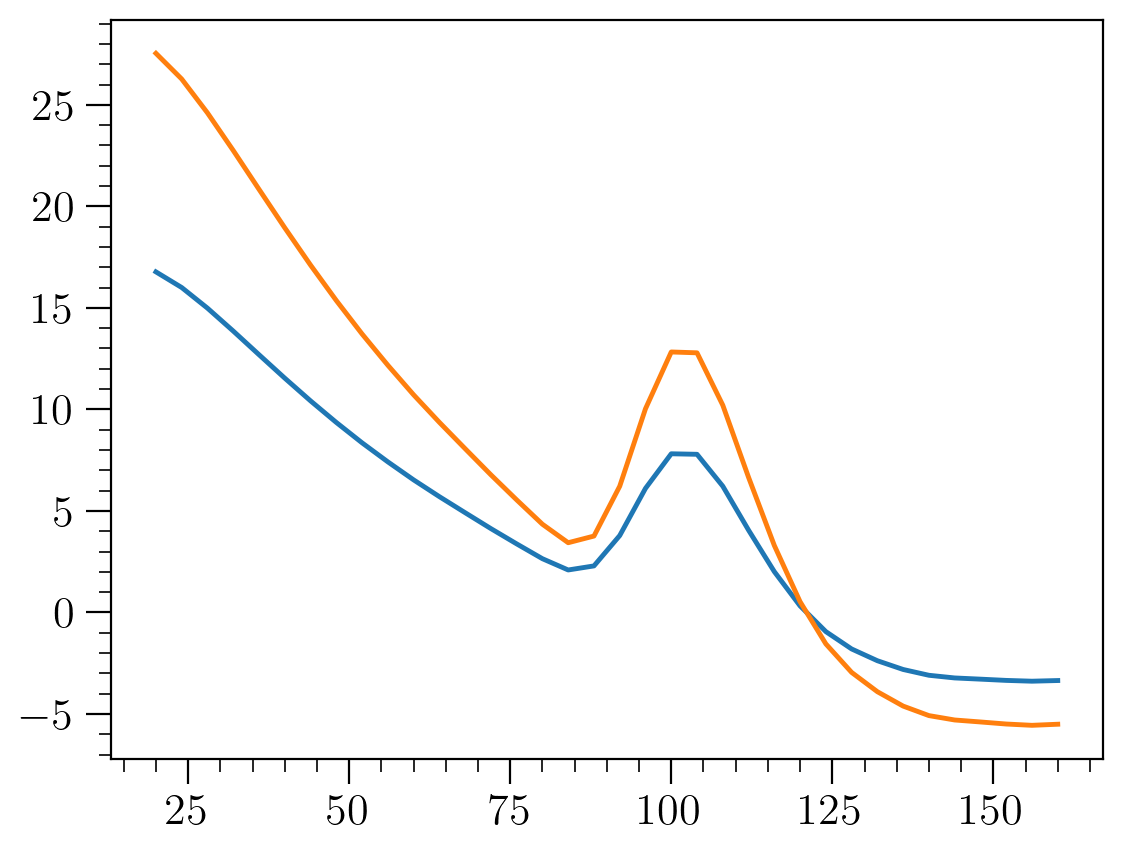

In [86]:
plt.plot(dist[0], dist[0]**2 * monopoleBF[1])
plt.plot(dist[0], dist[0]**2 * monopoleBF_I[1])

In [87]:
sep = np.linspace(20,160,200)

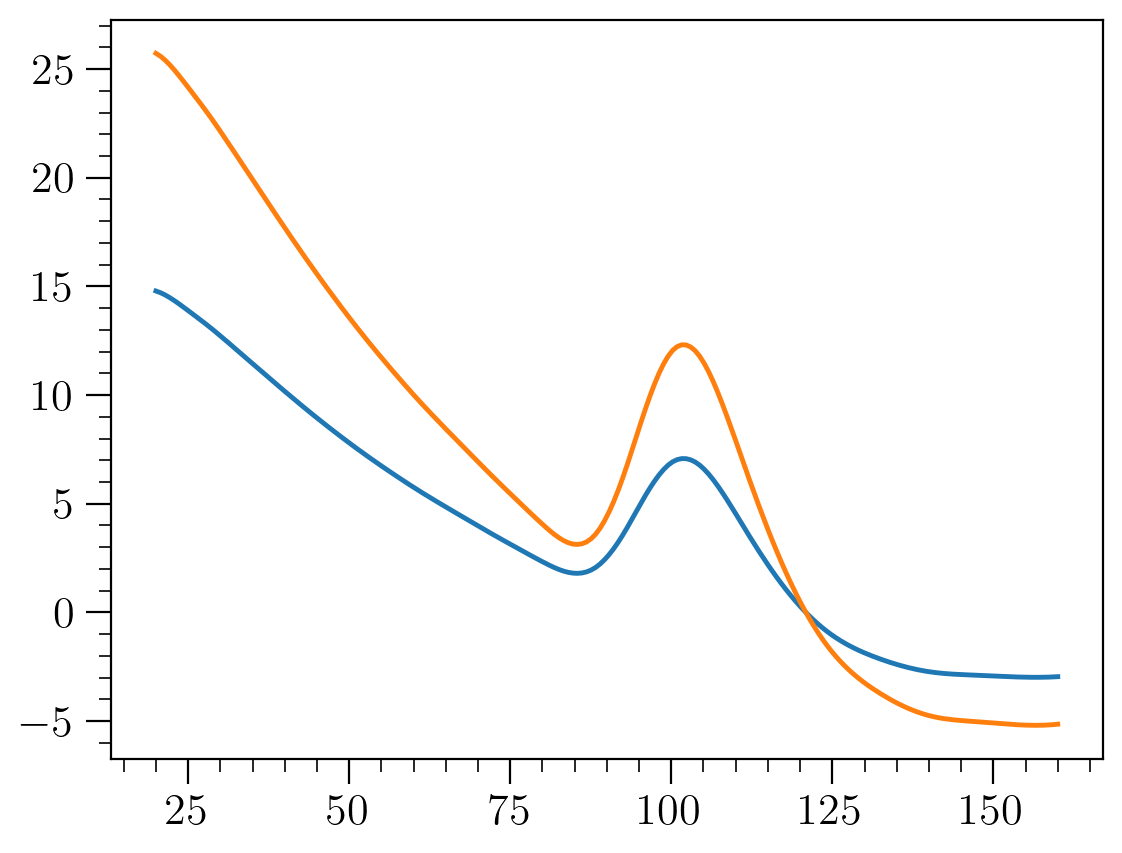

In [88]:
plt.plot(sep, sep**2 * monoBF(sep))
plt.plot(sep, sep**2 * monoBF_I(sep))

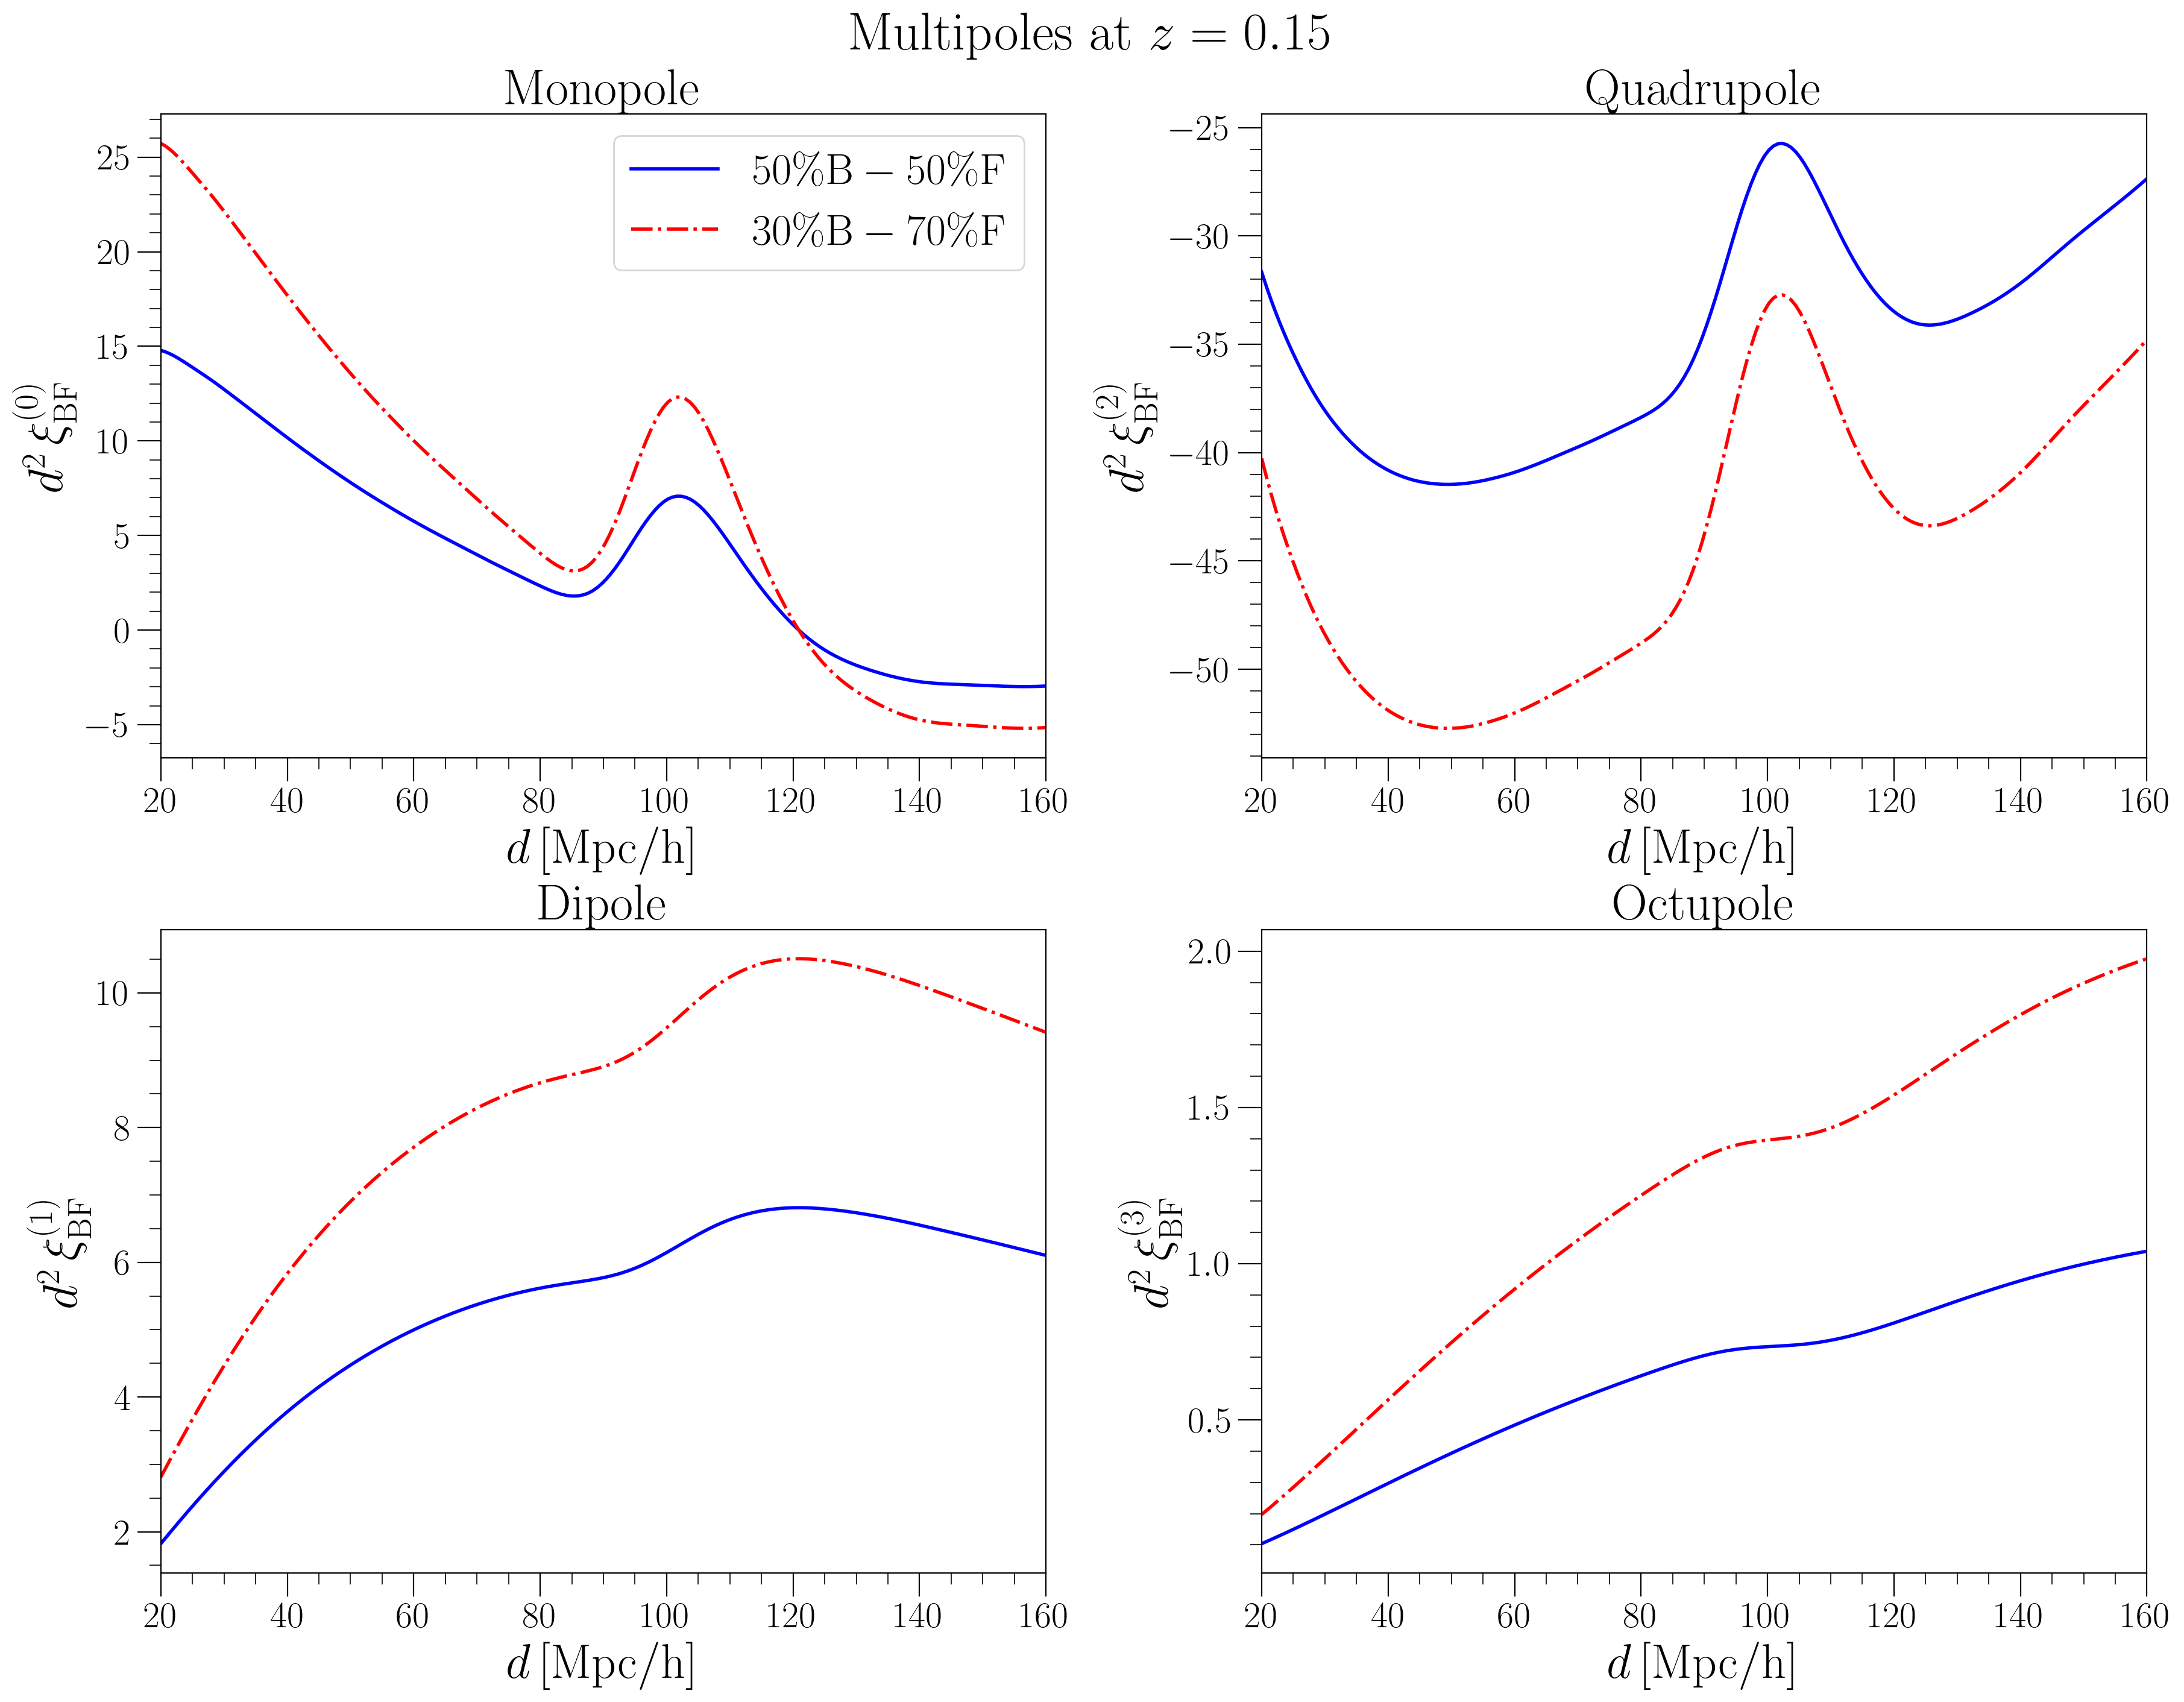

In [89]:
# Create a grid of plots (4 rows, 2 columns)

fig, axs = plt.subplots(2, 2, figsize=(18, 14), gridspec_kw={'hspace' : 0.0})

colors = ['blue', 'red']
titles = [r'$50\%\mathrm{B}-50\%\mathrm{F}$', r'$30\%\mathrm{B}-70\%\mathrm{F}$']

lss = ['-', '-.']

line_width = 2.0

axs[0,0].plot(sep, sep**2 * monoBF(sep), label=titles[0], color = colors[0], linewidth = line_width, ls = lss[0])    
axs[1,0].plot(sep, sep**2 * dipBF(sep), color = colors[0], linewidth = line_width, ls = lss[0])
axs[0,1].plot(sep, sep**2 * quadBF(sep), color = colors[0], linewidth = line_width, ls = lss[0])
axs[1,1].plot(sep, sep**2 * octBF(sep), color = colors[0], linewidth = line_width, ls = lss[0])

axs[0,0].plot(sep, sep**2 * monoBF_I(sep), label=titles[1], color = colors[1], linewidth = line_width, ls = lss[1])    
axs[1,0].plot(sep, sep**2 * dipBF_I(sep), color = colors[1], linewidth = line_width, ls = lss[1])
axs[0,1].plot(sep, sep**2 * quadBF_I(sep), color = colors[1], linewidth = line_width, ls = lss[1])
axs[1,1].plot(sep, sep**2 * octBF_I(sep), color = colors[1], linewidth = line_width, ls = lss[1])


# Set y-axis labels for the first column (1st subplot in each row)

ylabels = [r'$d^2\,\xi^{(0)}_{\mathrm{BF}}$', r'$d^2\,\xi^{(1)}_{\mathrm{BF}}$', r'$d^2\,\xi^{(2)}_{\mathrm{BF}}$', r'$d^2\,\xi^{(3)}_{\mathrm{BF}}$']

axs[0,0].set_ylabel(ylabels[0])
axs[1,0].set_ylabel(ylabels[1])
axs[0,1].set_ylabel(ylabels[2])
axs[1,1].set_ylabel(ylabels[3])

# Add extra space between y-axis label and tick params

axs[0, 0].yaxis.set_label_coords(-0.095, 0.5)
#axs[1, 0].yaxis.set_label_coords(-0.075, 0.5)
axs[0, 1].yaxis.set_label_coords(-0.1175, 0.5)
#axs[1, 1].yaxis.set_label_coords(-0.075, 0.5)

# Add tags to each subplot

axs[0, 0].set_title('Monopole', fontsize=30)
axs[1, 0].set_title('Dipole', fontsize=30)
axs[0, 1].set_title('Quadrupole', fontsize=30)
axs[1, 1].set_title('Octupole', fontsize=30)

# Set labels for the x-axes in the bottom row

for i in range(2):
    axs[0, i].set_xlim(left=20, right=160)
    axs[1, i].set_xlim(left=20, right=160)

# Set labels for the x-axes in the bottom row

for i in range(2):
    axs[0, i].set_xlabel(r'$d\,\mathrm{[Mpc/h]}$')
    axs[1, i].set_xlabel(r'$d\,\mathrm{[Mpc/h]}$')

   
fig.suptitle(r'Multipoles at $z=0.15$', fontsize=32)


# Increase tick, label, and legend font sizes

for i in range(2):
    for j in range(2):
        axs[i, j].tick_params(axis='both', which='major', labelsize=22, size=14)
        axs[i, j].tick_params(axis='both', which='minor', size=7)
        axs[i, j].xaxis.label.set_size(29)
        axs[i, j].yaxis.label.set_size(29)

# Create a legend for the first subplot (axs[0, 0])

axs[0, 0].legend(fontsize=26)
 
fig.set_constrained_layout(True)
 
plt.savefig("plots/multipoles_z015.pdf", bbox_inches='tight')

# Extract Signal integrals

In [90]:
mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)

mu0Tab = mySolver.Transforms(0)
mu2Tab = mySolver.Transforms(1)
mu4Tab = mySolver.Transforms(2)
nu1Tab = mySolver.Transforms(3)
nu3Tab = mySolver.Transforms(4)

In [91]:
tab_dict = {
    "mu0" : mu0Tab,
    "mu2" : mu2Tab,
    "mu4" : mu4Tab,
    "nu1" : nu1Tab,
    "nu3" : nu3Tab
}

for i,label in enumerate(tab_dict):
    np.savetxt(fname='Signals/'+label+'_z0_fid.dat', X = np.transpose(tab_dict[label]))

# Extract $\sigma_8(z)$

In [92]:
mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)

s8 = mySolver.Sigma8(zin=10.)

s8(z_bins)

array([0.75251092, 0.71377615, 0.67735175, 0.64330419, 0.61161342,
       0.58219735, 0.55493634, 0.52969006, 0.50630982, 0.48464672,
       0.46455684, 0.44590437, 0.4285631 , 0.41241705, 0.39736048,
       0.38329745, 0.37014122, 0.35781353, 0.34624384])

In [93]:
s8(0.0)

array(0.81446844)

In [94]:
s8Tab = np.transpose(np.array([np.flip(np.linspace(0., 10., 100)),mySolver.results.get_sigma8()]))

In [95]:
np.savetxt("Covariance/sigma8_CAMB.dat", s8Tab)

In [96]:
import itertools as it

which_comb = list(it.combinations_with_replacement(['b', 'f'],2))

for i, comb in enumerate(which_comb):
    print(i,comb)

0 ('b', 'b')
1 ('b', 'f')
2 ('f', 'f')
